### Problem Statement
The detection of failures and flaw in manufacturing tools and equipment has demonstrated, to be a challenge to scale its assurance and execution. Deflation in manufacturing tools and equipment takes place owing to many elements, generally tool wear, strain, heat failure and power failure. The aim of this study is to determine the machine failure by construction of classifier model on predictive maintenance dataset. The class imbalance data compromise the performance of the constructed model and this is addressed by assessing the oversampling methods with MTL architecture. Also, to gauge the performance of auxiliary learning towards the advancement of the primary task learning.

## 1. Reading and Understanding of Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
sns.set()

In [2]:
# importing dataset

df = pd.read_csv(r"C:\Users\sushi\Data Science\GIthub\Projects\Predictive-Maintenance\Dataset\ai4i2020.csv")
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


#### From Dataset Description-  https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

Target variable Machine failure indicates machine failure at particular datapoint for any of following failure mode are true. Five independent failure modes of machine failure are as follow:
-	tool wear failure (TWF) 
-	heat dissipation failure (HDF) 
-	power failure (PWF) 
-	overstrain failure (OSF) 
-	random failure (RNF) 

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail. Considering timeline and resources of study, study is limited to machine failure only. Eliminating five failure mode from dataframe. 


In [3]:
# Dropping all failure mode
df = df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis= 1)

In [4]:
# checking the dimensions of the dataframe

df.shape

(10000, 9)

In [5]:
# Checking missing value in dataset

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [6]:
# Checking the statistical aspects of the dataframe

df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
# Checking type and value count of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [8]:
# Logging operation

#logging.info('model checks are done')

## 2. Data Checks and Data Cleaning

In [9]:
# Checking categorical columns

cat_col= df.select_dtypes(include='object')
print(cat_col.columns)
print(len(cat_col.columns))

Index(['Product ID', 'Type'], dtype='object')
2


In [10]:
# Checking numerical columns

num_col= df.select_dtypes(exclude='object')
print(num_col.columns)
print(len(num_col.columns))

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')
7


In [11]:
# Checking for missing value

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

### 2.1 Data Preparation & Visualisation - Column `UDI`

In [12]:
# Checking value counts of column UDI

df['UDI'].value_counts()

1        1
6671     1
6664     1
6665     1
6666     1
6667     1
6668     1
6669     1
6670     1
6672     1
6662     1
6673     1
6674     1
6675     1
6676     1
6677     1
6678     1
6679     1
6663     1
6661     1
6564     1
6651     1
6644     1
6645     1
6646     1
6647     1
6648     1
6649     1
6650     1
6652     1
6660     1
6653     1
6654     1
6655     1
6656     1
6657     1
6658     1
6659     1
6680     1
6681     1
6682     1
6710     1
6703     1
6704     1
6705     1
6706     1
6707     1
6708     1
6709     1
6711     1
6683     1
6712     1
6713     1
6714     1
6715     1
6716     1
6717     1
6718     1
6702     1
6701     1
6700     1
6699     1
6684     1
6685     1
6686     1
6687     1
6688     1
6689     1
6690     1
6691     1
6692     1
6693     1
6694     1
6695     1
6696     1
6697     1
6698     1
6643     1
6642     1
6641     1
6592     1
6585     1
6586     1
6587     1
6588     1
6589     1
6590     1
6591     1
6593     1
6602     1
6594     1

In [13]:
# Note : UID: unique identifier ranging from 1 to 10000, Hence dropping columns 'UDI'

df = df.drop('UDI', axis = 1)

In [14]:
# Checking dataframe again

df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M14860,M,298.1,308.6,1551,42.8,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0
2,L47182,L,298.1,308.5,1498,49.4,5,0
3,L47183,L,298.2,308.6,1433,39.5,7,0
4,L47184,L,298.2,308.7,1408,40.0,9,0


### 2.2 Data Preparation & Visualisation - Column `Product ID`

In [15]:
# Checking value counts of column Product ID

df['Product ID'].value_counts()

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
L53846    1
H36081    1
L53848    1
L53849    1
L53851    1
M21521    1
L53852    1
L53853    1
L53854    1
L53855    1
L53856    1
L53857    1
M21538    1
M21522    1
H36074    1
L53743    1
L53830    1
M21503    1
L53824    1
M21505    1
L53826    1
L53827    1
L53828    1
M21509    1
M21511    1
L53839    1
H36066    1
M21513    1
L53834    1
L53835    1
M21516    1
L53837    1
L53838    1
L53859    1
L53860    1
L53861    1
L53889    1
M21562    1
M21563    1
M21564    1
M21565    1
L53886    1
L53887    1
M21568    1
L53890    1
L53862    1
L53891    1
H36126    1
L53893    1
L53894    1
L53895    1
L53896    1
M21577    1
L53881    1
H36114    1
M21559    1
L53878    1
L53863    1
L53864    1
L53865    1
L53866    1
L53867    1
L53868    1
L53869    1
L53870    1
M21551    1
M21552    1
M21553    1
M21554    1
M21555    1
L53876    1
L53877    1
L53822    1
L53821    1
L53820    1
L53771    1
L53764    1
M21445    1
L537

In [16]:
# Removing numbers from Product ID

def Product_ID(x):
    return x[0]

df['Product ID'] = df['Product ID'].apply(Product_ID)

df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,M,298.1,308.6,1551,42.8,0,0
1,L,L,298.2,308.7,1408,46.3,3,0
2,L,L,298.1,308.5,1498,49.4,5,0
3,L,L,298.2,308.6,1433,39.5,7,0
4,L,L,298.2,308.7,1408,40.0,9,0


In [17]:
# Checking Columns Product ID and Type are equal 

df['Product ID'].equals(df['Type'])

True

In [18]:
# As both coolumns Product ID and Type are equal, dropping Product ID

df= df.drop('Product ID', axis = 1)

In [19]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.3 Data Preparation & Visualisation - Column `Type`

In [20]:
# Checking value counts of column Type

df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [21]:
# Checking percentage of value distribution between levels

100*(df['Type'].value_counts(normalize = True))

L    60.00
M    29.97
H    10.03
Name: Type, dtype: float64

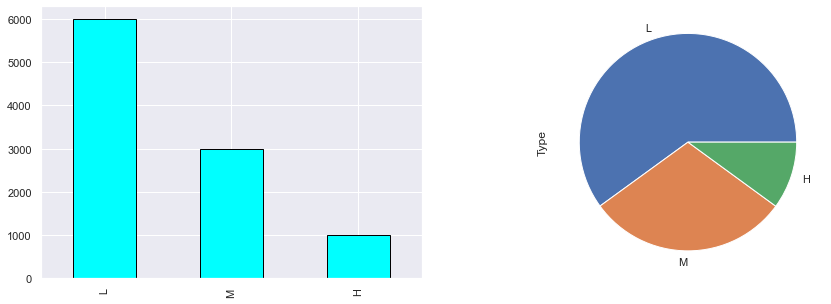

In [22]:
# Plotting values

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
df['Type'].value_counts().plot.bar(color= 'Cyan',edgecolor='Black')

ax1 = f.add_subplot(122)
df['Type'].value_counts().plot.pie()
plt.show()

### Inferences:

- Letters L, M, or H for low (60% of all products), medium (30%) and high (10%) as product quality Type.
- lets check if product quality and machine failure have any correlation.

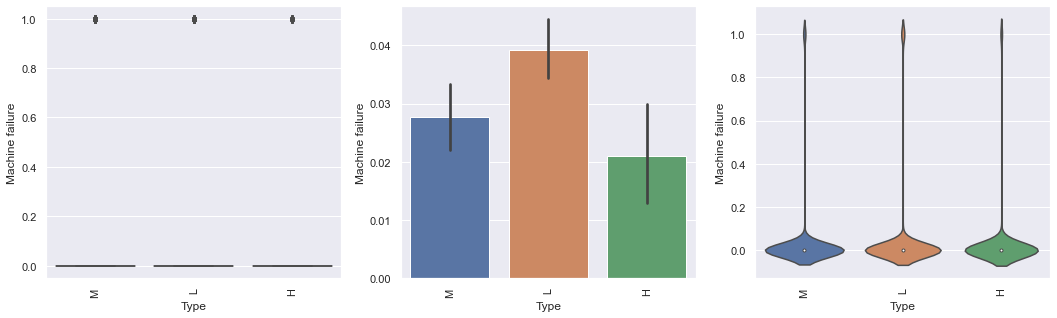

In [23]:
# Plotting Type vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Type'], y= df['Machine failure'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.barplot(x = df['Type'], y= df['Machine failure'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Type'], y= df['Machine failure'], orient= 'vertical')
plt.xticks(rotation=90)
plt.show()

In [24]:
for i in df['Type'].unique():
    print(f'Machine Failure instances in Type {i} are {len(df[(df["Machine failure"] == 1) & (df["Type"] == i)])}')

Machine Failure instances in Type M are 83
Machine Failure instances in Type L are 235
Machine Failure instances in Type H are 21


In [25]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.4 Data Preparation & Visualisation - Column `Air temperature [K]`

In [26]:
# Checking value counts of column Type

df['Air temperature [K]'].value_counts()

300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
300.6    216
298.2    208
302.3    203
297.5    198
300.4    198
300.8    196
298.1    188
300.3    188
298.0    184
300.2    182
299.0    177
298.3    175
300.9    166
302.2    166
300.1    164
298.4    159
301.0    155
297.3    155
302.4    151
301.5    150
299.1    150
297.6    148
298.6    147
297.9    146
299.2    145
298.7    143
298.5    142
300.0    140
301.4    138
299.3    137
301.3    136
299.8    134
302.5    128
301.7    126
302.0    124
302.6    120
299.7    117
301.9    115
297.7    112
297.8    111
301.1    110
297.2    110
301.8    108
299.9    102
299.6    101
299.4    101
301.6    100
301.2     98
303.7     96
303.5     89
302.1     88
303.4     85
302.7     84
299.5     82
303.6     78
297.1     77
303.8     75
296.9     72
296.8     61
297.0     61
303.0     60
302.9     59
303.9     58
303.3     57
302.8     57
304.1     46
304.0     45
304.2     40
303.1     38
295.6     38
296.7     37
296.6     30

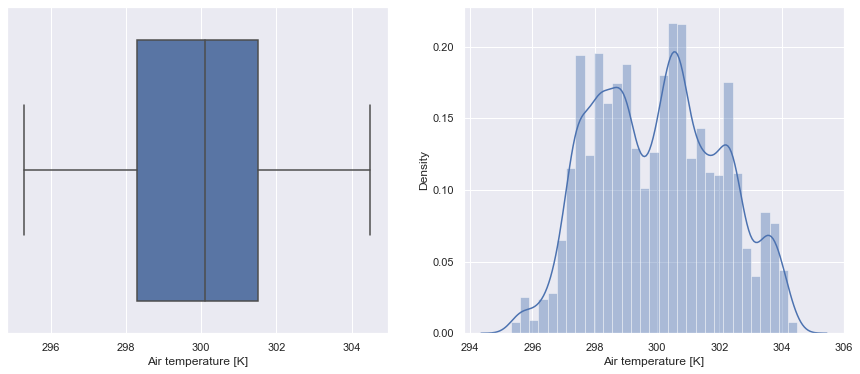

In [27]:
# Checking value distribution for column Air temperature [K]
plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Air temperature [K]'])

plt.subplot(122)
sns.distplot(df['Air temperature [K]'])
plt.show()

In [28]:
# Checking value distribution for column 'Air temperature [K]'
df['Air temperature [K]'].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64

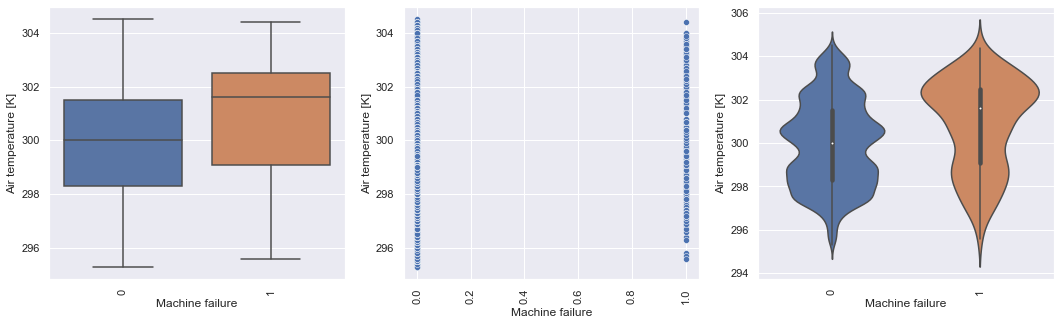

In [29]:
# Plotting Air temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Air temperature [K]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Air temperature [K]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Air temperature [K]'])
plt.xticks(rotation=90)
plt.show()

### Inferences:

- Values of column Air temperature [K] distributed with a standard deviation of 2 K around 300 K.
- Median value for machine failure is close to 302K.

In [30]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.5 Data Preparation & Visualisation - Column `Process temperature [K]`

In [31]:
# Checking value counts of column Type

df['Process temperature [K]'].value_counts()

310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
310.1    260
308.5    257
310.4    254
311.0    246
310.9    245
309.6    242
308.4    237
309.4    223
311.1    222
309.1    218
308.7    218
310.2    213
311.2    210
309.2    208
311.4    207
309.0    205
309.5    203
308.3    202
309.7    200
309.3    193
309.8    191
310.0    183
310.3    182
309.9    178
308.9    173
311.5    170
311.7    169
311.3    165
308.8    160
311.6    156
307.9    154
307.8    147
311.8    146
308.2    143
308.1    130
311.9    121
308.0    120
312.0    107
312.3     97
312.4     92
307.6     91
307.7     86
312.2     77
312.1     65
312.7     64
312.5     59
307.5     58
307.4     57
313.0     55
312.6     53
313.1     50
313.2     50
312.8     43
312.9     43
307.3     36
307.2     36
313.3     29
306.2     26
313.4     24
313.5     22
307.1     20
306.1     17
313.6     16
306.0     14
306.3     13
306.6     13
306.5      9
306.4      8
305.9      6
306.7      5
307.0      5
306.8      4

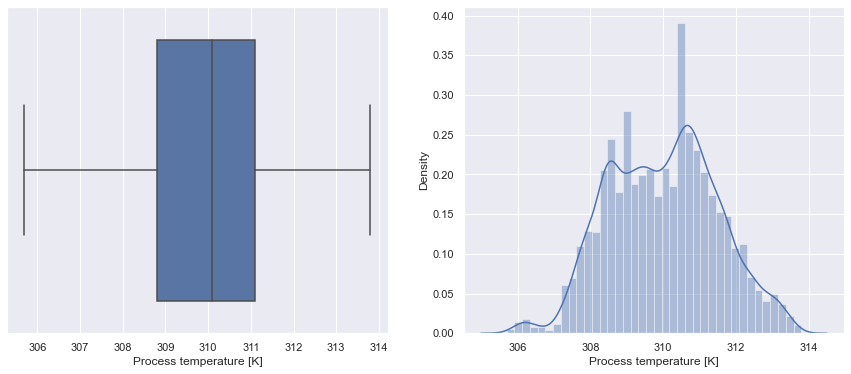

In [32]:
# Checking value distribution for column 'Process temperature [K]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Process temperature [K]'])

plt.subplot(122)
sns.distplot(df['Process temperature [K]'])
plt.show()

In [33]:
# Checking value distribution for column 'Process temperature [K]'
df['Process temperature [K]'].describe()

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64

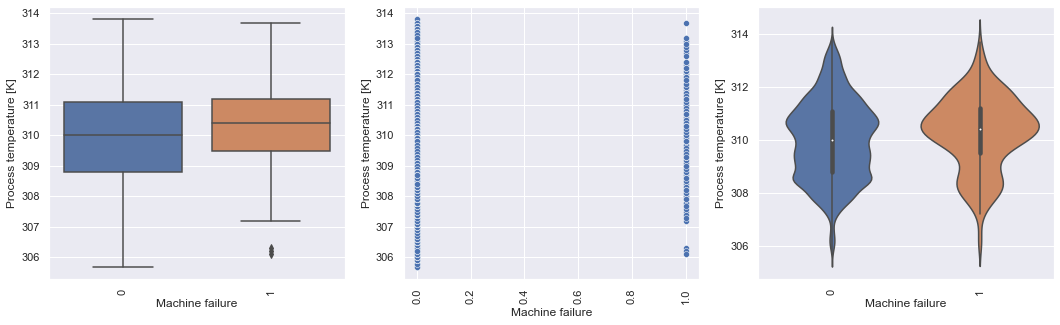

In [34]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Process temperature [K]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Process temperature [K]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Process temperature [K]'])
plt.xticks(rotation=90)
plt.show()

### Inference:

- Values of column Process temperature [K] distributed with a standard deviation of 1.48 K around 310 K.
- Median value for machine failure is close to 310.5K.

In [35]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.6 Data Preparation & Visualisation - Column `Rotational speed [rpm]`

In [36]:
# Checking value counts of column Type

df['Rotational speed [rpm]'].value_counts()

1452    48
1435    43
1447    42
1429    40
1469    40
1479    40
1450    39
1507    39
1418    39
1446    38
1477    38
1448    37
1486    37
1445    36
1397    36
1462    35
1471    35
1505    35
1456    35
1465    35
1492    35
1412    34
1495    34
1487    34
1434    34
1459    34
1530    34
1483    34
1470    34
1433    34
1496    33
1510    33
1488    33
1474    33
1419    33
1432    33
1490    32
1466    32
1430    32
1436    32
1422    32
1540    32
1491    32
1453    32
1521    32
1438    32
1457    32
1472    32
1390    32
1525    31
1481    31
1441    31
1420    31
1378    31
1501    31
1463    30
1511    30
1517    30
1520    30
1413    30
1499    30
1426    30
1424    30
1416    30
1451    30
1443    30
1427    30
1551    30
1402    30
1498    30
1425    30
1393    30
1523    30
1439    29
1431    29
1542    29
1384    29
1546    29
1442    29
1449    29
1423    29
1489    29
1548    29
1475    29
1408    29
1502    29
1440    29
1404    29
1504    29
1455    29
1389    29

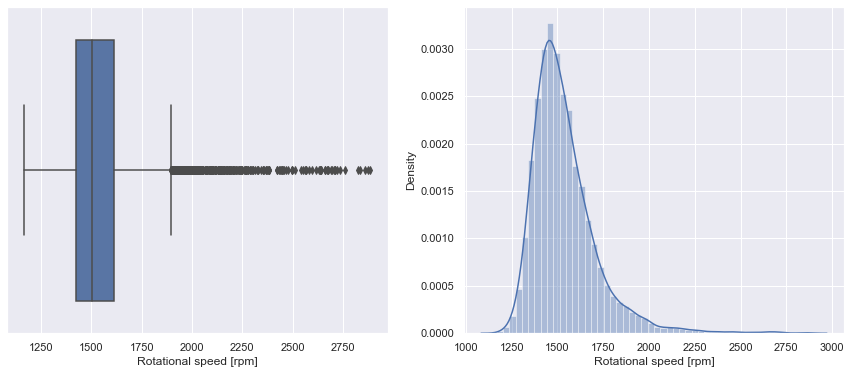

In [37]:
# Checking value distribution for column 'Rotational speed [rpm]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Rotational speed [rpm]'])

plt.subplot(122)
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [38]:
# Checking value distribution for column 'Rotational speed [rpm]'

df['Rotational speed [rpm]'].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64

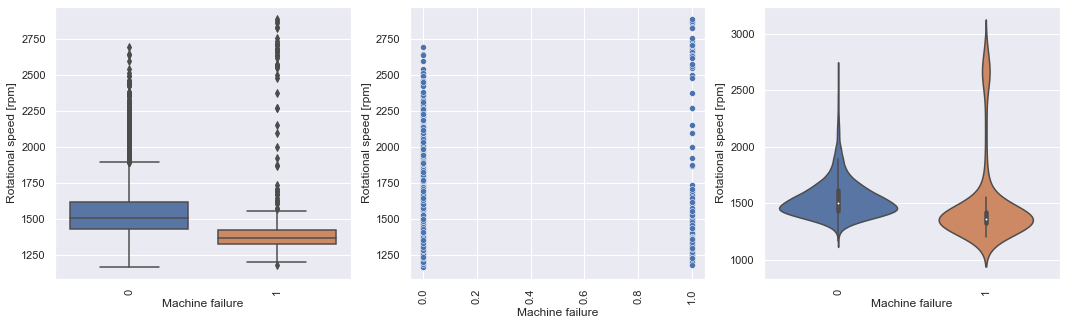

In [39]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Rotational speed [rpm]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Rotational speed [rpm]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Rotational speed [rpm]'])
plt.xticks(rotation=90)
plt.show()

### Inference:

- Values of column Rotational speed [rpm] distributed with a standard deviation of 179.28 K around 1503 K.
- Median value for machine failure is close to 1350K.

In [40]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.7 Data Preparation & Visualisation - Column `Torque [Nm]`

In [41]:
# Checking value counts of column Type

df['Torque [Nm]'].value_counts()

40.2    52
38.5    50
42.4    50
35.8    50
37.7    49
39.9    48
40.6    48
38.2    48
40.0    47
36.6    47
41.2    47
35.2    47
42.5    46
37.9    46
43.4    46
36.0    45
43.2    45
40.4    45
47.3    45
44.5    44
39.0    44
36.1    44
38.8    44
43.9    44
42.8    44
40.7    43
41.8    43
34.6    42
46.6    42
37.2    42
41.4    41
44.0    41
41.9    41
37.6    41
39.2    41
36.7    41
45.5    41
44.4    41
44.1    41
36.9    41
39.4    41
45.7    41
40.1    40
38.0    40
36.8    40
44.7    39
41.5    39
45.8    39
36.2    39
35.0    39
42.9    39
43.0    39
45.3    39
40.9    38
38.1    38
34.1    38
39.7    38
35.9    38
32.7    37
46.5    37
31.1    37
43.5    37
37.5    37
30.8    37
33.3    37
47.7    37
37.0    37
39.8    37
44.3    37
42.6    37
46.3    37
37.1    37
44.9    37
32.4    37
42.0    37
45.1    37
41.3    36
34.3    36
48.1    36
34.9    36
43.1    36
33.7    36
44.2    36
43.7    36
42.1    36
47.6    36
35.7    36
45.4    35
33.4    35
41.1    35
38.7    35

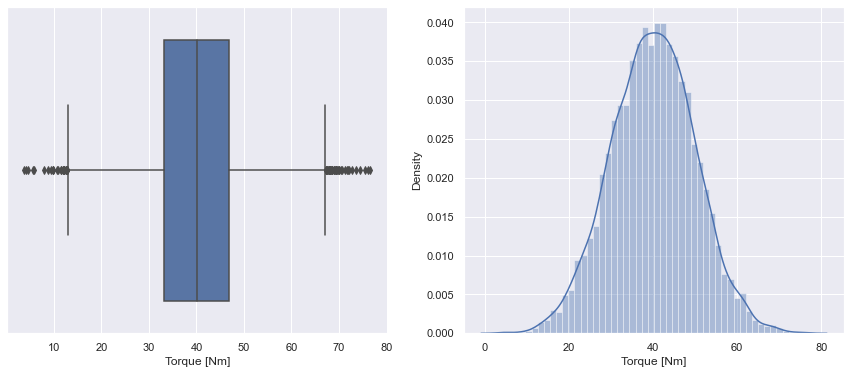

In [42]:
# Checking value distribution for column 'Torque [Nm]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Torque [Nm]'])

plt.subplot(122)
sns.distplot(df['Torque [Nm]'])
plt.show()

In [43]:
# Checking value distribution for column 'Torque [Nm]'

df['Torque [Nm]'].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64

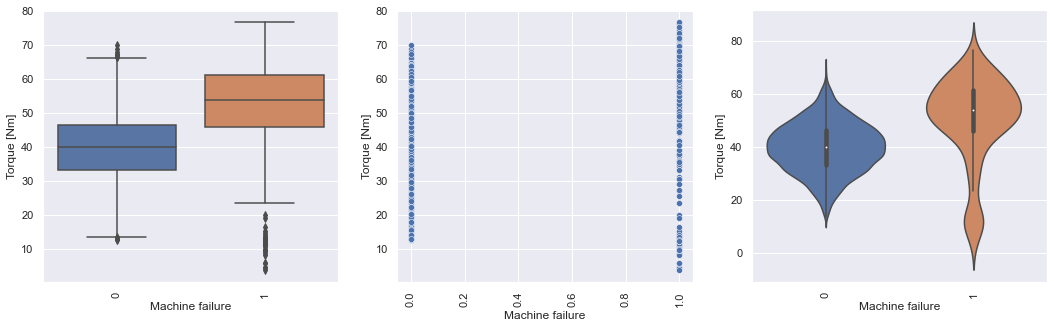

In [44]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Torque [Nm]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Torque [Nm]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Torque [Nm]'])
plt.xticks(rotation=90)
plt.show()

### Inference:
- Values of column Torque [Nm] distributed with a standard deviation of 9.96 Nm around 40 Nm. 
- Median value for machine failure is close to 55 Nm.

In [45]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.8 Data Preparation & Visualisation - Column `Tool wear [min]`

In [46]:
# Checking value counts of column Type

df['Tool wear [min]'].value_counts()

0      120
2       69
5       63
7       58
59      58
166     57
119     57
9       55
146     54
96      54
148     54
181     54
179     53
137     53
33      53
15      53
124     53
44      52
150     52
171     52
76      52
98      52
74      52
17      52
142     51
85      51
92      51
94      51
35      51
20      51
160     51
104     50
79      50
37      50
13      50
139     50
197     50
188     50
57      50
176     50
23      50
155     50
12      50
168     50
49      49
192     49
40      49
127     49
112     49
173     49
121     49
64      49
24      49
174     48
30      48
109     48
18      48
130     48
190     48
66      48
129     48
144     48
135     48
68      48
175     48
158     48
101     48
71      48
87      48
83      47
203     47
116     47
48      47
114     47
199     47
47      47
42      47
28      47
162     47
73      47
62      47
111     47
117     47
100     47
170     47
204     47
14      47
50      47
193     47
54      47
177     47

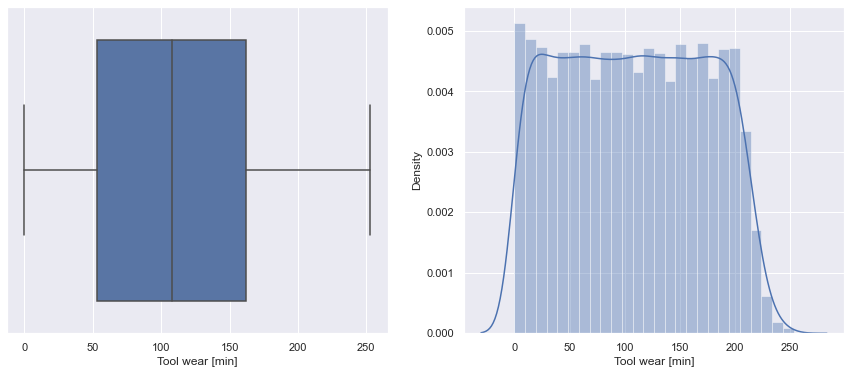

In [47]:
# Checking value distribution for column 'Tool wear [min]'

plt.figure(figsize = (15,6))

plt.subplot(121)
sns.boxplot(df['Tool wear [min]'])

plt.subplot(122)
sns.distplot(df['Tool wear [min]'])
plt.show()

In [48]:
# Checking value distribution for column 'Tool wear [min]'

df['Tool wear [min]'].describe()

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool wear [min], dtype: float64

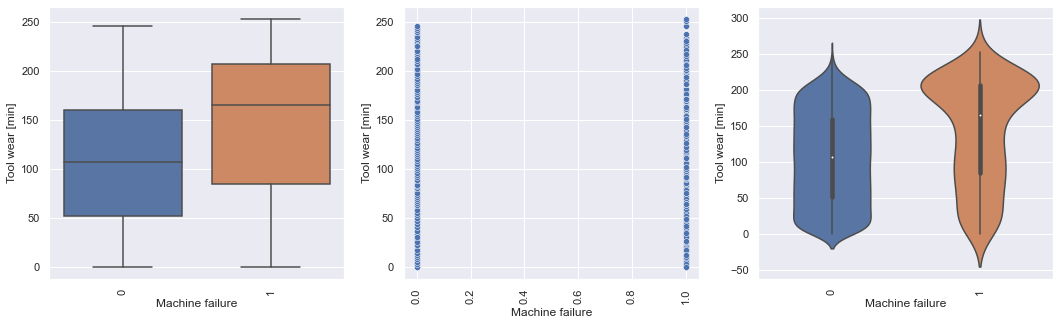

In [49]:
# Plotting Process temperature [K] vs. Machine failure 

f = plt.figure(figsize=(18,5))

ax = f.add_subplot(131)
sns.boxplot(x = df['Machine failure'], y = df['Tool wear [min]'])
plt.xticks(rotation=90)

ax1 = f.add_subplot(132)
sns.scatterplot(x = df['Machine failure'], y = df['Tool wear [min]'])
plt.xticks(rotation=90)
    
ax2 = f.add_subplot(133)
sns.violinplot(x = df['Machine failure'], y = df['Tool wear [min]'])
plt.xticks(rotation=90)
plt.show()

### Inference:
- Values of column Tool wear [min] distributed with a standard deviation of 63.65 in around 108 min.
- Median value for machine failure is close to 160 min.

In [50]:
# Checking dataframe again

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 2.9 Data Visualisation

- Multivarious analysis
- Pairplot
- Heatmap

#### 2.9.1 Tool Wear Vs. Roatational speed Vs. Machine Failure

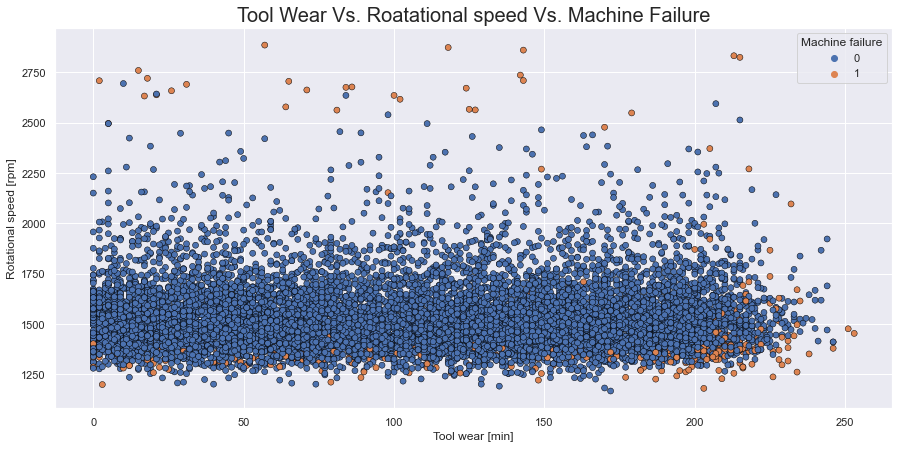

In [51]:
# Effect of Tool wear and rotational speed on tool wear failure

plt.figure(figsize=(15, 7))

sns.scatterplot(x='Tool wear [min]', 
                y='Rotational speed [rpm]', 
                hue='Machine failure', 
                data= df,
                edgecolor = 'Black')

plt.title('Tool Wear Vs. Roatational speed Vs. Machine Failure',fontweight="10", size=20)
plt.show()

#### Inference:
- Tool wear failure mostly happened between 1300 to 2000 rpm with Tool wear inbetween 200 to 250 min.
- Exposure of maximum tool wear are may be cause of tool wear failure.

#### 2.9.2 Air temperature [K] Vs. rotational speed Vs. Machine failure

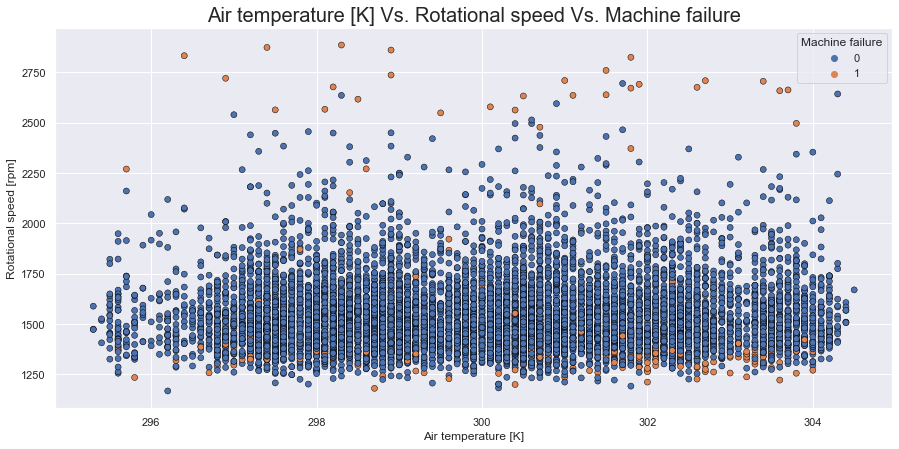

In [52]:
# Checking Heat dissipation failure the effect of Air temperture and rotational speed of machine 

plt.figure(figsize=(15, 7))

sns.scatterplot(x='Air temperature [K]', 
                y='Rotational speed [rpm]', 
                hue='Machine failure', 
                data= df,
                edgecolor = 'Black')

plt.title('Air temperature [K] Vs. Rotational speed Vs. Machine failure',fontweight="10", size=20)
plt.show()

#### Inference:
- Low Rotational speed below 1400 rpm and air temperature between 301K to 303K are responsible for Heat dissipation failure
- low rotational speed may cause machine failure.

#### 2.9.3 Process temperature [K] Vs. rotational speed Vs. Machine failure

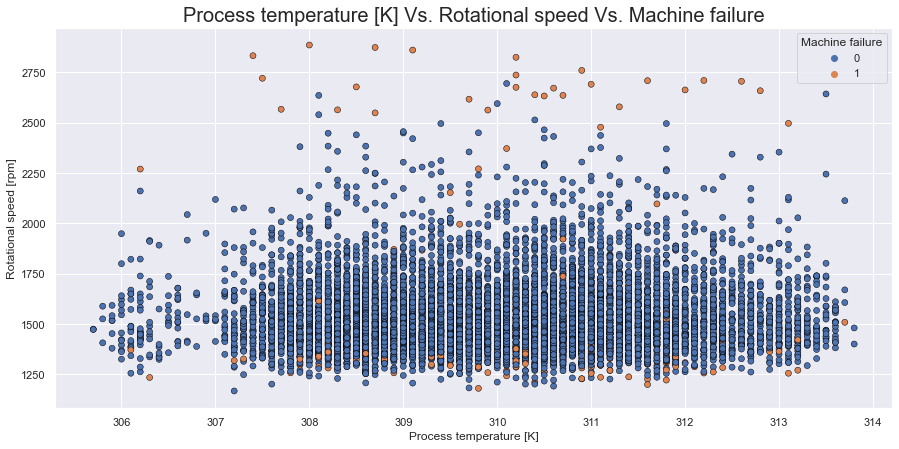

In [53]:
# Checking Heat dissipation failure the effect of process temperture and Rotational speed of machine 

plt.figure(figsize=(15,7))

sns.scatterplot(x='Process temperature [K]', 
                y='Rotational speed [rpm]', 
                hue='Machine failure', 
                data= df,
                edgecolor = 'Black')

plt.title('Process temperature [K] Vs. Rotational speed Vs. Machine failure',fontweight="10", size=20)
plt.show()

#### Inference:
- Low Rotational speed below 1400 rpm and Process temperature between 307K to 312K are responsible for Heat dissipation failure
- low rotational speed and process temperature above air temperature may causing machine failure.

#### 2.9.4 Torque [Nm] Vs. Tool wear [min] Vs. Machine Failure

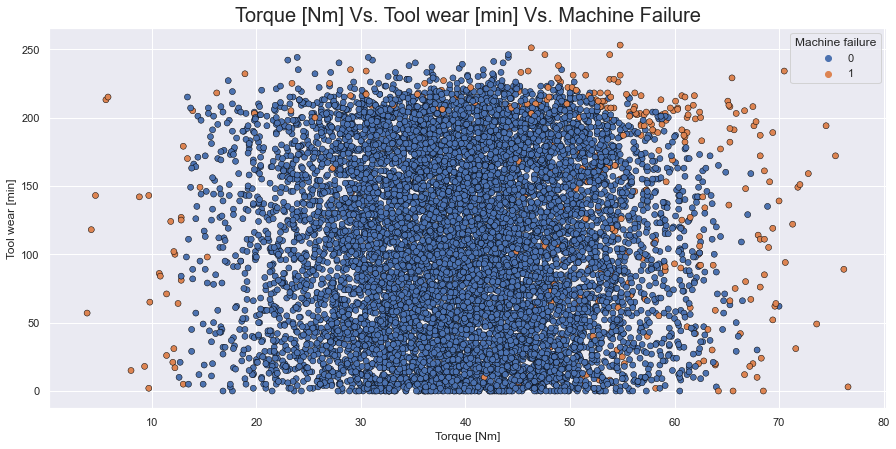

In [54]:
# The effect of product of tool wear and torque resulting overstrain failure
plt.figure(figsize=(15, 7))

sns.scatterplot(x='Torque [Nm]', 
                y='Tool wear [min]', 
                hue='Machine failure', 
                data= df,
                edgecolor = 'Black')

plt.title('Torque [Nm] Vs. Tool wear [min] Vs. Machine Failure',fontweight="10", size=20)
plt.show()

#### Inference:
- Torque values above 45Nm and tool wear exposure for more than 150min are responsible for OverStrain Failure.
- High Torque and high tool wear exposure time are causing moore strain on tool for Machine failure.

#### 2.15.5 Data Preparation & Visualisation: Pairplot

In [55]:
#sns.pairplot(df)
#plt.show()

#### 2.15.6 Data Preparation & Visualisation: Heatmap

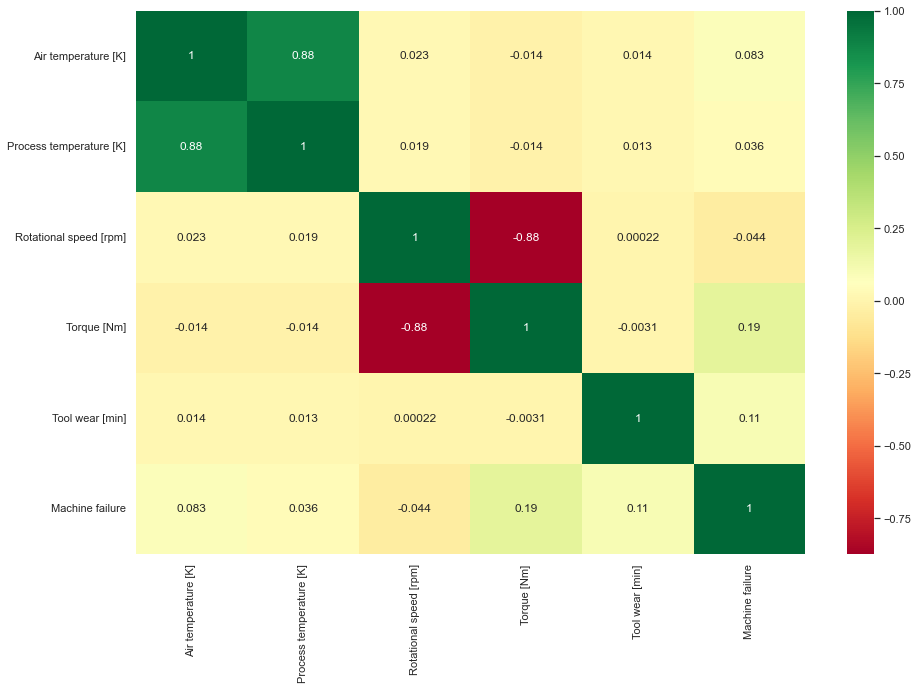

In [56]:
# Plotting heatmap

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Inferences:

- Air temperature and process temperature are highly positively correlated 0.88
- while torque and rotational speed are highly negatively correlated -0.88

In [57]:
# Checking Dataframe
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


## 3. Feature Engineering
- Dummy varible creation
- Outlier treatment

In [58]:
# Dataframe

df.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
5,M,298.1,308.6,1425,41.9,11,0
6,L,298.1,308.6,1558,42.4,14,0
7,L,298.1,308.6,1527,40.2,16,0
8,M,298.3,308.7,1667,28.6,18,0
9,M,298.5,309.0,1741,28.0,21,0


In [59]:
# Converting Nominal data of column 'Type' to dummy variable

df = pd.get_dummies(df)

In [60]:
# Checking dataframe again

df.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0
5,298.1,308.6,1425,41.9,11,0,0,0,1
6,298.1,308.6,1558,42.4,14,0,0,1,0
7,298.1,308.6,1527,40.2,16,0,0,1,0
8,298.3,308.7,1667,28.6,18,0,0,0,1
9,298.5,309.0,1741,28.0,21,0,0,0,1


### Outlier treatment

In [61]:
# Checking percentiles values of dataframe columns
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.100300,0.600000,0.299700
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.300415,0.489922,0.458149
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,295.900000,306.600000,1275.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,297.400000,308.100000,1364.000000,27.200000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,1.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,1.000000,1.000000
90%,302.700000,311.900000,1746.000000,52.600000,195.000000,0.000000,1.000000,1.000000,1.000000


In [62]:
# Removing values beyond 99% for Column- Rotational speed [rpm]

Rotational_speed = df['Rotational speed [rpm]'].quantile(0.99)
df = df[df["Rotational speed [rpm]"] < Rotational_speed]

In [63]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
count,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000
mean,300.002424,310.004677,1529.787475,40.251343,107.936768,0.031111,0.100505,0.599394,0.300101
std,1.999685,1.483608,154.946235,9.659507,63.634644,0.173627,0.300687,0.490046,0.458325
min,295.300000,305.700000,1168.000000,15.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1422.000000,33.400000,53.000000,0.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1501.000000,40.200000,108.000000,0.000000,0.000000,1.000000,0.000000
75%,301.500000,311.100000,1608.000000,46.800000,162.000000,0.000000,0.000000,1.000000,1.000000
max,304.500000,313.800000,2188.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000


## 4. Data Pre-Processing
- Data spliting into train, test
- Feature scaling
- Defining X_train & y_train for model building

### 4.1 Data spliting into train, test

In [64]:
# Train-test split

from sklearn.model_selection import train_test_split
seed = 1

X = df.drop('Machine failure', axis=1)
y = df["Machine failure"]

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=seed)

 ### 4.2 Printing shapes X_train & y_train for model building

In [65]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6930, 8)
y_train shape: (6930,)
X_test shape: (2970, 8)
y_test shape: (2970,)


### 4.3 Feature scaling

In [66]:
# Importing Sklearn library for scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [67]:
# Instantiate an object

scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [68]:
# Converting to dataframe

X_train = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.673913,0.641975,0.403922,0.279146,0.043478,0.0,1.0,0.0
1,0.228261,0.333333,0.221569,0.571429,0.841897,0.0,1.0,0.0
2,0.619565,0.629630,0.202941,0.688013,0.079051,0.0,1.0,0.0
3,0.597826,0.827160,0.587255,0.169130,0.415020,0.0,1.0,0.0
4,0.173913,0.271605,0.795098,0.083744,0.268775,0.0,0.0,1.0


In [69]:
# Converting to dataframe

X_test = pd.DataFrame(X_test_sc, columns = X_test.columns)
X_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.728261,0.506173,0.305882,0.405583,0.786561,0.0,1.0,0.0
1,0.217391,0.283951,0.343137,0.339901,0.233202,0.0,1.0,0.0
2,0.543478,0.753086,0.953922,0.052545,0.806324,1.0,0.0,0.0
3,0.304348,0.308642,0.556863,0.188834,0.106719,0.0,0.0,1.0
4,0.586957,0.592593,0.776471,0.093596,0.766798,0.0,1.0,0.0


## 5. Model Building:

Models for classification of machine failure

### 5.1 Logistic regression

In [70]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'Machine Failure in Training Set: {len(y_train[y_train==1])}')
print(f'No Machine Failure in Training Set: {len(y_train[y_train==0])}')

X_train shape: (6930, 8)
y_train shape: (6930,)
Machine Failure in Training Set: 204
No Machine Failure in Training Set: 6726


In [71]:
# Applying LogisticRegression on X_train, y_train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [72]:
# Calculating accuracy

print(f'Accuracy score without class augmentation technique: {round(metrics.accuracy_score(y_test, y_pred_lr),4)}')

Accuracy score without class augmentation technique: 0.969


In [73]:
# Confusion matrix 

from sklearn.metrics import confusion_matrix

confusion = metrics.confusion_matrix(y_test, y_pred_lr)

confusion

array([[2866,    0],
       [  92,   12]], dtype=int64)

In [74]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2866
           1       1.00      0.12      0.21       104

    accuracy                           0.97      2970
   macro avg       0.98      0.56      0.60      2970
weighted avg       0.97      0.97      0.96      2970



In [75]:
# Defining confusion matrix attributes

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

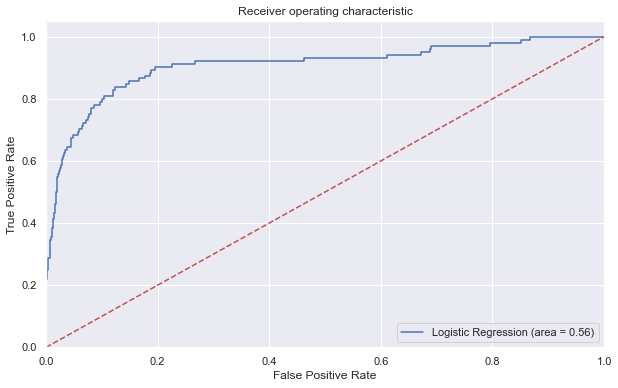

In [76]:
# Plotting ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

Counter({0: 6726, 1: 204})


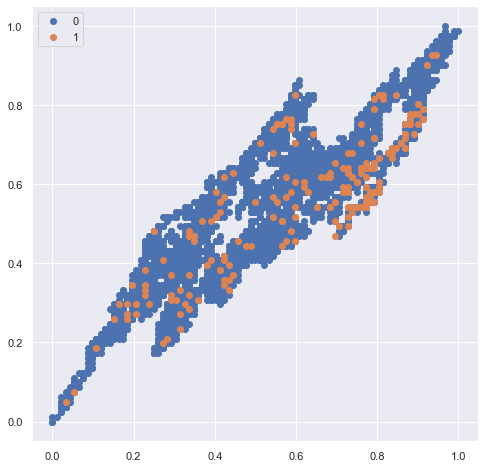

In [77]:
# Plotting y_train plot considering True & False values before SMOTE

plt.figure(figsize = (8,8))

from collections import Counter

counter = Counter(y_train)
print(counter)

# scatter plot of examples by class label

for label, _ in counter.items():
    row_ix = np.where(y_train == label)[0]
    plt.scatter(X_train.iloc[row_ix, 0], X_train.iloc[row_ix, 1], label=str(label))
    
plt.legend()
plt.show()

### Inferences:
- From accuracy, confusion matrix and ROC curve, data is inclined towards the majority class, accuracy paradox is concluded.
- Lets try oversampling methods starting form SMOTE.

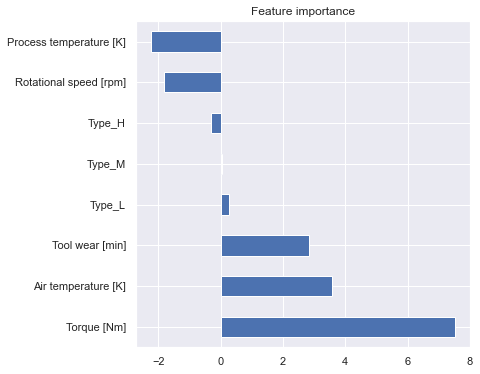

In [78]:
# Plotting Feature importance for Logitsic regression 

Coef = pd.Series(lr.coef_.ravel(), index= X_train.columns)

imp_Coef_elastic = Coef.sort_values(ascending=False)

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

imp_Coef_elastic.plot(kind = "barh")

plt.title("Feature importance")

plt.show()

In [79]:
# Calculating ROC AUC score

from sklearn.metrics import roc_auc_score

y_hat = lr.predict(X_test)

score_lr = roc_auc_score(y_test, y_hat)

print(f'ROC AUC: {score_lr}')

ROC AUC: 0.5576923076923077


In [80]:
# Storing results

results = pd.DataFrame(columns = ['Algorithm',
                                  'Sensitivity/Recall',
                                  'Specificity',
                                  'FPR',
                                  'Precision',
                                  'F1 Score',
                                  'Misclassification Rate',
                                  'ROC AUC'])

results.loc[len(results)] = ['LR',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_lr]
                              
results

,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.0,0.0,1.0,0.206897,0.030976,0.557692


### 5.2 Logistic regression Using SMOTE

In [81]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# importing SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=5,random_state = seed)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of X_train_res: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train_res: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 204
Before OverSampling, counts of label '0': 6726 

After OverSampling, the shape of X_train_res: (13452, 8)
After OverSampling, the shape of y_train_res: (13452,) 

After OverSampling, counts of label '1': 6726
After OverSampling, counts of label '0': 6726


In [82]:
# Applying LogisticRegression on Oversampled data

lr1 = LogisticRegression()

lr1.fit(X_train_res, y_train_res.ravel())

y_pred_lr1 = lr1.predict(X_test)

In [83]:
# Print classification report

print(classification_report(y_test, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      2866
           1       0.17      0.86      0.28       104

    accuracy                           0.85      2970
   macro avg       0.58      0.85      0.60      2970
weighted avg       0.97      0.85      0.89      2970



In [84]:
# Plotting confusion matrix

confusion_lr1 = confusion_matrix(y_test, y_pred_lr1)

confusion_lr1

array([[2432,  434],
       [  15,   89]], dtype=int64)

In [85]:
# Defining confusion matrix attributes

TP = confusion_lr1[1,1] # true positive 
TN = confusion_lr1[0,0] # true negatives
FP = confusion_lr1[0,1] # false positives
FN = confusion_lr1[1,0] # false negatives

print('Accuracy Score on test data: ', round(metrics.accuracy_score(y_test, y_pred_lr1),4))

Accuracy Score on test data:  0.8488


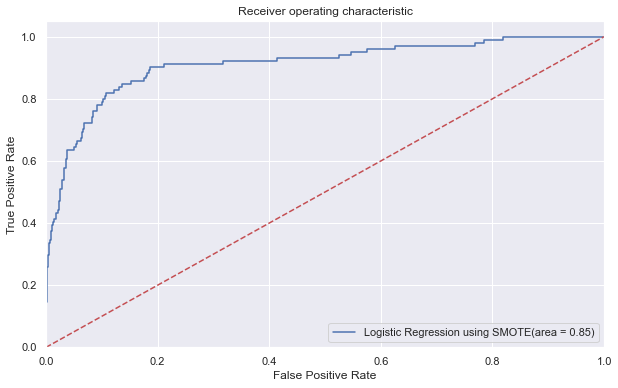

In [86]:
# Plotting ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test, lr1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr1.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Logistic Regression using SMOTE(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Counter({0: 6726, 1: 6726})


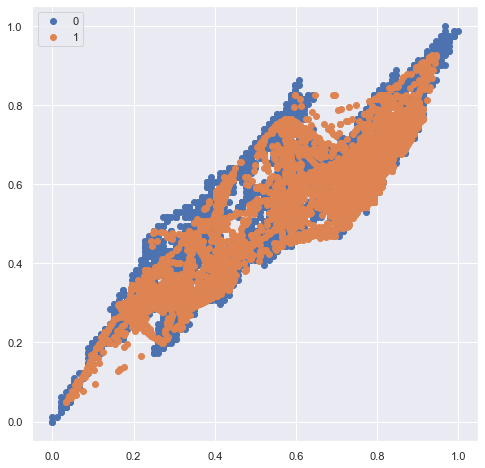

In [87]:
# Plotting y_train_res plot considering True & False values after SMOTE

plt.figure(figsize = (8,8))
from collections import Counter
counter = Counter(y_train_res)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_train_res == label)[0]
    plt.scatter(X_train_res.iloc[row_ix, 0], X_train_res.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

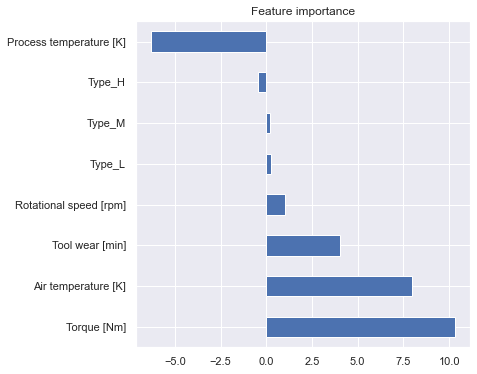

In [88]:
# Plotting Feature importance for Logitsic regression after SMOTE

Coef = pd.Series(lr1.coef_.ravel(), index= X_train.columns)

imp_Coef_elastic = Coef.sort_values(ascending=False)

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

imp_Coef_elastic.plot(kind = "barh")

plt.title("Feature importance")

plt.show()

In [89]:
# Calculating ROC AUC score

y_hat = lr1.predict(X_test)

score_lr1 = roc_auc_score(y_test, y_hat)

print(f'ROC AUC: {score_lr1}')

ROC AUC: 0.8521693327607494


In [90]:
# Storing results

results.loc[len(results)] = ['LR using SMOTE',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_lr1]
                              
results

,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.000000,0.000000,1.000000,0.206897,0.030976,0.557692
1,LR using SMOTE,0.855769,0.848569,0.151431,0.170172,0.283892,0.151178,0.852169


### 5.3 Random forest

In [91]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 0)

# fit

rfc.fit(X_train,y_train)

# Making predictions

y_pred_rfc = rfc.predict(X_test)

In [92]:
# Plotting confusion matrix

confusion_rfc = confusion_matrix(y_test, y_pred_rfc)

confusion_rfc

array([[2865,    1],
       [  57,   47]], dtype=int64)

In [93]:
# calculating evaluation metrics

TN = confusion_rfc[0,0] # true positive 
TP = confusion_rfc[1,1] # true negatives
FP = confusion_rfc[0,1] # false positives
FN = confusion_rfc[1,0] # false negatives

print('Accuracy Score on test data: ', round(metrics.accuracy_score(y_test,y_pred_rfc),4))

# Let's see the sensitivity of model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.9805
Sensitivity:  0.4519
Specificity:  0.9997
false postive rate:  0.0003
positive predictive value:  0.9792
Negative predictive value:  0.9805
Misclassification Rate:  0.0195


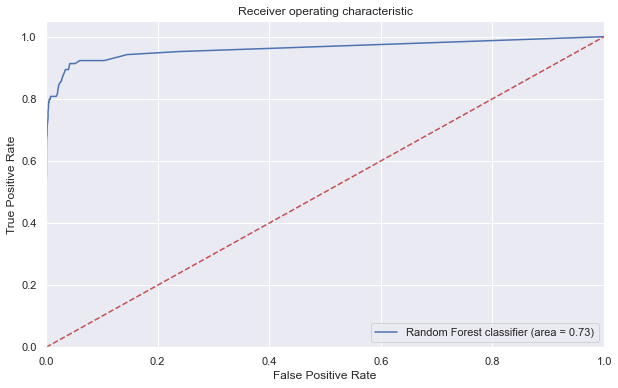

In [94]:
# Plotting ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline

logit_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Random Forest classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

In [95]:
# Calculating ROC AUC score

y_hat = rfc.predict(X_test)

score_rfc = roc_auc_score(y_test, y_hat)

print(f'ROC AUC: {score_rfc}')

ROC AUC: 0.7257870792849858


#### 5.3.1 Random forest:  hyperparameter tuning 

In [96]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(25,100,25)]

# The function to measure the qulity of Split
criterion = ['entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [25, 50, 75], 'criterion': ['entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [97]:
# Using the random grid to search for best hyperparameters

rfc1 = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 

rfc1 = RandomizedSearchCV(estimator = rfc1, 
                          param_distributions = random_grid, 
                          n_iter = 10, 
                          cv = 3, 
                          verbose=2, 
                          random_state=42, 
                          n_jobs = -1)

# Fit the random search model

rfc1.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75]},
                   random_state=42, verbose=2)

In [98]:
# Making predictions

y_pred_rfc1 = rfc1.predict(X_test)

In [99]:
# Plotting confusion matrix

confusion_rfc1 = confusion_matrix(y_test, y_pred_rfc1)

confusion_rfc1

array([[2865,    1],
       [  49,   55]], dtype=int64)

In [100]:
# Building randomforest regressor with the best estimator 

rfc1 = rfc1.best_estimator_

# Fitting

rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=60,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=75)

In [101]:
# Feature importances

importance = rfc1.feature_importances_

rfc1_feature_imp = pd.DataFrame(importance, index = X_train.columns, columns = ['Feature_importance'])

rfc1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

round(rfc1_feature_imp,3)

,Feature_importance
Torque [Nm],0.302
Rotational speed [rpm],0.227
Tool wear [min],0.214
Air temperature [K],0.134
Process temperature [K],0.102
Type_L,0.010
Type_M,0.007
Type_H,0.004


In [102]:
# calculating ROC AUC score for ANN model

y_hat = rfc1.predict(X_test)

score_rfc1 = roc_auc_score(y_test, y_hat)

print(f'ROC AUC: {score_rfc1}')

ROC AUC: 0.7354024639003705


In [103]:
#Storing results

TN = confusion_rfc1[0,0] # true positive 
TP = confusion_rfc1[1,1] # true negatives
FP = confusion_rfc1[0,1] # false positives
FN = confusion_rfc1[1,0] # false negatives

results.loc[len(results)] = ['RF with HP tuning',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_rfc1]
                              
results


,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.000000,0.000000,1.000000,0.206897,0.030976,0.557692
1,LR using SMOTE,0.855769,0.848569,0.151431,0.170172,0.283892,0.151178,0.852169
2,RF with HP tuning,0.528846,0.999651,0.000349,0.982143,0.687500,0.016835,0.735402


### 5.3 Random forest using SMOTE

In [104]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier

rfc_smote = RandomForestClassifier(random_state= 0)

# fit

rfc_smote.fit(X_train_res,y_train_res)

# Making predictions

y_pred_rfc_smote = rfc_smote.predict(X_test)

In [105]:
# Plotting confusion matrix

confusion_rfc_smote = confusion_matrix(y_test, y_pred_rfc_smote)

confusion_rfc_smote

array([[2796,   70],
       [  20,   84]], dtype=int64)

In [106]:
TN = confusion_rfc_smote[0,0] # true positive 
TP = confusion_rfc_smote[1,1] # true negatives
FP = confusion_rfc_smote[0,1] # false positives
FN = confusion_rfc_smote[1,0] # false negatives

print('Accuracy Score on test data: ', round(metrics.accuracy_score(y_test,y_pred_rfc_smote),4))

# Let's see the sensitivity of model
print('Sensitivity: ', (round(TP / float(TP+FN),4)))

# Let us calculate specificity
print('Specificity: ',(round(TN / float(TN+FP),4)))

# Calculate false postive rate
print('false postive rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),4))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),4))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN),4))

Accuracy Score on test data:  0.9697
Sensitivity:  0.8077
Specificity:  0.9756
false postive rate:  0.0244
positive predictive value:  0.5455
Negative predictive value:  0.9929
Misclassification Rate:  0.0303


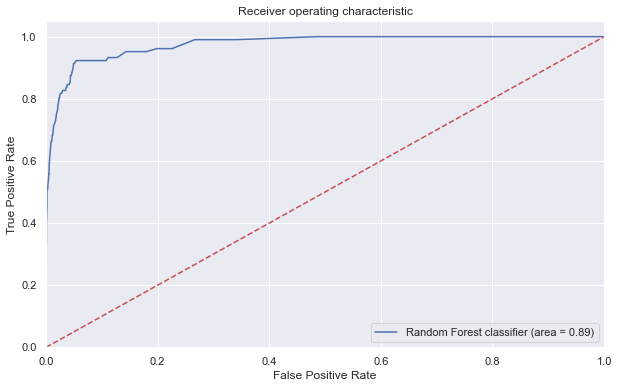

In [107]:
# Plotting ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline

logit_roc_auc = roc_auc_score(y_test, rfc_smote.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_smote.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Random Forest classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.savefig('Log_ROC')
plt.show()

In [108]:
# calculating ROC AUC score for ANN model

y_hat = rfc_smote.predict(X_test)

score_rfc_smote = roc_auc_score(y_test, y_hat)

print(f'ROC AUC: {score_rfc_smote}')

ROC AUC: 0.8916340114874658


#### 5.3.1 Random forest using SMOTE:  hyperparameter tuning 

In [109]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(25,100,25)]

# The function to measure the qulity of Split
criterion = ['entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [25, 50, 75], 'criterion': ['entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [110]:
# Using the random grid to search for best hyperparameters

rfc1_smote = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 

rfc1_smote = RandomizedSearchCV(estimator = rfc1_smote, 
                          param_distributions = random_grid, 
                          n_iter = 10, 
                          cv = 3, 
                          verbose=2, 
                          random_state=42, 
                          n_jobs = -1)

# Fit the random search model

rfc1_smote.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75]},
                   random_state=42, verbose=2)

In [111]:
# Making predictions

y_pred_rfc1_smote = rfc1_smote.predict(X_test)

In [112]:
# Plotting confusion matrix

confusion_rfc1_smote = confusion_matrix(y_test, y_pred_rfc1_smote)

confusion_rfc1_smote

array([[2806,   60],
       [  22,   82]], dtype=int64)

In [113]:
# Building randomforest regressor with the best estimator 

rfc1_smote = rfc1_smote.best_estimator_

# Fitting

rfc1_smote.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=60,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=75)

In [114]:
# Feature importances

importance = rfc1_smote.feature_importances_

rfc1_feature_imp_smote = pd.DataFrame(importance, index = X_train_res.columns, columns = ['Feature_importance'])

rfc1_feature_imp_smote.sort_values(by = 'Feature_importance', ascending = False, inplace = True)

round(rfc1_feature_imp_smote,3)

,Feature_importance
Torque [Nm],0.284
Rotational speed [rpm],0.250
Tool wear [min],0.224
Air temperature [K],0.132
Process temperature [K],0.088
Type_L,0.008
Type_M,0.007
Type_H,0.005


In [115]:
# calculating ROC AUC score for ANN model

y_hat = rfc1_smote.predict(X_test)

score_rfc1_smote = roc_auc_score(y_test, y_hat)

print(f'ROC AUC: {score_rfc1_smote}')

ROC AUC: 0.8791299855064684


In [116]:
#Storing results

TN = confusion_rfc1_smote[0,0] # true positive 
TP = confusion_rfc1_smote[1,1] # true negatives
FP = confusion_rfc1_smote[0,1] # false positives
FN = confusion_rfc1_smote[1,0] # false negatives

results.loc[len(results)] = ['RF using SMOTE with HP tuning',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_rfc1_smote]
                              
results

,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.000000,0.000000,1.000000,0.206897,0.030976,0.557692
1,LR using SMOTE,0.855769,0.848569,0.151431,0.170172,0.283892,0.151178,0.852169
2,RF with HP tuning,0.528846,0.999651,0.000349,0.982143,0.687500,0.016835,0.735402
3,RF using SMOTE with HP tuning,0.788462,0.979065,0.020935,0.577465,0.666667,0.027609,0.879130


### 5.3 ANN

In [117]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras import backend as K
from keras import Model
from tensorflow import keras
import tensorflow as tf

In [118]:
# Defining Input layer attributes

n_inputs_ANN = X_train.shape[1]

latent_dimension = 1

batch_size = 64

hidden_nodes = 16

In [119]:
# Classification using ANN: Defining classification model

visible_ANN = Input(shape=(n_inputs_ANN,), name='input_layer')

x_ANN = Dense(units=n_inputs_ANN,
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim = X_train.shape[1])(visible_ANN)

x_ANN = Dense(units=n_inputs_ANN,
          kernel_initializer='he_uniform',
          activation='relu')(x_ANN)

x_ANN_out = Dense(units= 1,
              kernel_initializer = 'glorot_uniform',
              activation = 'sigmoid',
              name = 'Classifier')(x_ANN)

classifier_ANN = Model(visible_ANN, x_ANN_out)

In [120]:
# Model summary 
classifier_ANN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 Classifier (Dense)          (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Defining evaluation metrics
metrics = [keras.metrics.FalseNegatives(name="fn"),
           keras.metrics.FalsePositives(name="fp"),
           keras.metrics.TrueNegatives(name="tn"),
           keras.metrics.TruePositives(name="tp"),
           keras.metrics.Precision(name="precision"),
           keras.metrics.Recall(name="recall"),]

# Compling classifier with loss, optimizer and metrics
classifier_ANN.compile(loss = 'binary_crossentropy', 
                   optimizer = keras.optimizers.Adam(1e-4), 
                   metrics= metrics)

In [122]:
# calculating class weight for imbalance data

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = np.unique(y_train),y= y_train)
class_weights

array([ 0.51516503, 16.98529412])

In [123]:
# Rounding off the value and preventing from Error rise.
class_wt = dict()

for index, value in enumerate(class_weights):
    class_wt[index] = round(value,3)

print(class_wt)

{0: 0.515, 1: 16.985}


In [124]:
# fitting the model

history_ANN = classifier_ANN.fit(X_train, 
                         y_train, 
                         validation_data = (X_test, y_test), 
                         batch_size = batch_size, 
                         epochs = 100, 
                         verbose= 2, 
                         shuffle=False,
                         class_weight=class_wt).history

Epoch 1/100
109/109 - 11s - loss: 0.7554 - fn: 198.0000 - fp: 59.0000 - tn: 6667.0000 - tp: 6.0000 - precision: 0.0923 - recall: 0.0294 - val_loss: 0.4623 - val_fn: 99.0000 - val_fp: 36.0000 - val_tn: 2830.0000 - val_tp: 5.0000 - val_precision: 0.1220 - val_recall: 0.0481 - 11s/epoch - 101ms/step
Epoch 2/100
109/109 - 1s - loss: 0.7418 - fn: 194.0000 - fp: 112.0000 - tn: 6614.0000 - tp: 10.0000 - precision: 0.0820 - recall: 0.0490 - val_loss: 0.4810 - val_fn: 99.0000 - val_fp: 61.0000 - val_tn: 2805.0000 - val_tp: 5.0000 - val_precision: 0.0758 - val_recall: 0.0481 - 520ms/epoch - 5ms/step
Epoch 3/100
109/109 - 1s - loss: 0.7296 - fn: 189.0000 - fp: 209.0000 - tn: 6517.0000 - tp: 15.0000 - precision: 0.0670 - recall: 0.0735 - val_loss: 0.4997 - val_fn: 99.0000 - val_fp: 97.0000 - val_tn: 2769.0000 - val_tp: 5.0000 - val_precision: 0.0490 - val_recall: 0.0481 - 514ms/epoch - 5ms/step
Epoch 4/100
109/109 - 1s - loss: 0.7179 - fn: 187.0000 - fp: 297.0000 - tn: 6429.0000 - tp: 17.0000 - pr

Epoch 29/100
109/109 - 1s - loss: 0.6255 - fn: 48.0000 - fp: 2162.0000 - tn: 4564.0000 - tp: 156.0000 - precision: 0.0673 - recall: 0.7647 - val_loss: 0.6270 - val_fn: 19.0000 - val_fp: 909.0000 - val_tn: 1957.0000 - val_tp: 85.0000 - val_precision: 0.0855 - val_recall: 0.8173 - 516ms/epoch - 5ms/step
Epoch 30/100
109/109 - 1s - loss: 0.6228 - fn: 48.0000 - fp: 2120.0000 - tn: 4606.0000 - tp: 156.0000 - precision: 0.0685 - recall: 0.7647 - val_loss: 0.6236 - val_fn: 18.0000 - val_fp: 885.0000 - val_tn: 1981.0000 - val_tp: 86.0000 - val_precision: 0.0886 - val_recall: 0.8269 - 586ms/epoch - 5ms/step
Epoch 31/100
109/109 - 1s - loss: 0.6200 - fn: 45.0000 - fp: 2073.0000 - tn: 4653.0000 - tp: 159.0000 - precision: 0.0712 - recall: 0.7794 - val_loss: 0.6196 - val_fn: 18.0000 - val_fp: 870.0000 - val_tn: 1996.0000 - val_tp: 86.0000 - val_precision: 0.0900 - val_recall: 0.8269 - 510ms/epoch - 5ms/step
Epoch 32/100
109/109 - 1s - loss: 0.6171 - fn: 45.0000 - fp: 2023.0000 - tn: 4703.0000 - tp

109/109 - 0s - loss: 0.5439 - fn: 29.0000 - fp: 1704.0000 - tn: 5022.0000 - tp: 175.0000 - precision: 0.0931 - recall: 0.8578 - val_loss: 0.5400 - val_fn: 12.0000 - val_fp: 667.0000 - val_tn: 2199.0000 - val_tp: 92.0000 - val_precision: 0.1212 - val_recall: 0.8846 - 489ms/epoch - 4ms/step
Epoch 57/100
109/109 - 0s - loss: 0.5409 - fn: 28.0000 - fp: 1694.0000 - tn: 5032.0000 - tp: 176.0000 - precision: 0.0941 - recall: 0.8627 - val_loss: 0.5372 - val_fn: 12.0000 - val_fp: 669.0000 - val_tn: 2197.0000 - val_tp: 92.0000 - val_precision: 0.1209 - val_recall: 0.8846 - 482ms/epoch - 4ms/step
Epoch 58/100
109/109 - 1s - loss: 0.5381 - fn: 27.0000 - fp: 1686.0000 - tn: 5040.0000 - tp: 177.0000 - precision: 0.0950 - recall: 0.8676 - val_loss: 0.5344 - val_fn: 12.0000 - val_fp: 667.0000 - val_tn: 2199.0000 - val_tp: 92.0000 - val_precision: 0.1212 - val_recall: 0.8846 - 514ms/epoch - 5ms/step
Epoch 59/100
109/109 - 1s - loss: 0.5353 - fn: 28.0000 - fp: 1668.0000 - tn: 5058.0000 - tp: 176.0000 - 

Epoch 84/100
109/109 - 0s - loss: 0.4754 - fn: 28.0000 - fp: 1538.0000 - tn: 5188.0000 - tp: 176.0000 - precision: 0.1027 - recall: 0.8627 - val_loss: 0.4625 - val_fn: 14.0000 - val_fp: 579.0000 - val_tn: 2287.0000 - val_tp: 90.0000 - val_precision: 0.1345 - val_recall: 0.8654 - 475ms/epoch - 4ms/step
Epoch 85/100
109/109 - 0s - loss: 0.4735 - fn: 30.0000 - fp: 1536.0000 - tn: 5190.0000 - tp: 174.0000 - precision: 0.1018 - recall: 0.8529 - val_loss: 0.4600 - val_fn: 14.0000 - val_fp: 577.0000 - val_tn: 2289.0000 - val_tp: 90.0000 - val_precision: 0.1349 - val_recall: 0.8654 - 466ms/epoch - 4ms/step
Epoch 86/100
109/109 - 1s - loss: 0.4716 - fn: 29.0000 - fp: 1532.0000 - tn: 5194.0000 - tp: 175.0000 - precision: 0.1025 - recall: 0.8578 - val_loss: 0.4572 - val_fn: 14.0000 - val_fp: 575.0000 - val_tn: 2291.0000 - val_tp: 90.0000 - val_precision: 0.1353 - val_recall: 0.8654 - 501ms/epoch - 5ms/step
Epoch 87/100
109/109 - 0s - loss: 0.4698 - fn: 30.0000 - fp: 1527.0000 - tn: 5199.0000 - tp

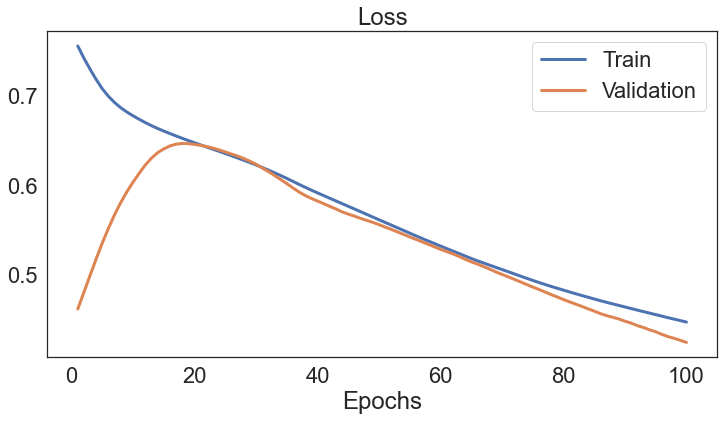

In [125]:
# Plotting model for training and Validation loss

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)

sns.set_style("white")


def model_analysis(history_ANN):
    train_loss = history_ANN["loss"]
    val_loss = history_ANN["val_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(12,6))
    plt.title("Loss")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.show()

model_analysis(history_ANN)

In [126]:
# Predicting target variabe using classifier

y_pred_ann = classifier_ANN.predict(X_test)

# Rounding off y_pred_ann values to avoid valueerror in confusion matrix

y_pred_ann = [int(np.round(x)) for x in y_pred_ann]

In [127]:
# Plotting confusion matrix

cm_ANN = confusion_matrix(y_test, y_pred_ann)

cm_ANN

array([[2324,  542],
       [  14,   90]], dtype=int64)

In [128]:
# calculating ROC AUC score for ANN model

y_hat = lr1.predict(X_test)

score_ANN = roc_auc_score(y_test, y_pred_ann)

print(f'ROC AUC: {score_ANN}')

ROC AUC: 0.8381354340007514


In [129]:
# Storing results

TN = cm_ANN[0,0] # true positive 
TP = cm_ANN[1,1] # true negatives
FP = cm_ANN[0,1] # false positives
FN = cm_ANN[1,0] # false negatives

results.loc[len(results)] = ['ANN',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_ANN]
                              
results

,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.000000,0.000000,1.000000,0.206897,0.030976,0.557692
1,LR using SMOTE,0.855769,0.848569,0.151431,0.170172,0.283892,0.151178,0.852169
2,RF with HP tuning,0.528846,0.999651,0.000349,0.982143,0.687500,0.016835,0.735402
3,RF using SMOTE with HP tuning,0.788462,0.979065,0.020935,0.577465,0.666667,0.027609,0.879130
4,ANN,0.865385,0.810886,0.189114,0.142405,0.244565,0.187205,0.838135



### 5.3 ANN Using SMOTE

In [130]:
# Input layer X_train_res, y_train_res.ravel()

n_inputs_ANN_SMOTE = X_train_res.shape[1]

In [131]:
# Classification using ANN using SMOTE

visible_ANN_SMOTE = Input(shape=(n_inputs_ANN_SMOTE,), name='input_layer')

x_ANN_SMOTE = Dense(units=n_inputs_ANN_SMOTE,
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim = X_train_res.shape[1])(visible_ANN_SMOTE)

x_ANN_SMOTE = Dense(units=n_inputs_ANN_SMOTE,
          kernel_initializer='he_uniform',
          activation='relu')(x_ANN_SMOTE)

x_ANN_SMOTE_out = Dense(units= 1,
              kernel_initializer = 'glorot_uniform',
              activation = 'sigmoid',
              name = 'Classifier')(x_ANN_SMOTE)

classifier_ANN_SMOTE = Model(visible_ANN_SMOTE, x_ANN_SMOTE_out)

In [132]:
# Model summary

classifier_ANN_SMOTE.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 8)]               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 Classifier (Dense)          (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Defining evaluation metrics

metrics = [keras.metrics.FalseNegatives(name="fn"),
           keras.metrics.FalsePositives(name="fp"),
           keras.metrics.TrueNegatives(name="tn"),
           keras.metrics.TruePositives(name="tp"),
           keras.metrics.Precision(name="precision"),
           keras.metrics.Recall(name="recall"),]

# Compling classifier with loss, optimizer and metrics

classifier_ANN_SMOTE.compile(loss = 'binary_crossentropy', 
                   optimizer = keras.optimizers.Adam(1e-4), 
                   metrics= metrics)

In [134]:
# fitting the model
history_ANN_SMOTE = classifier_ANN_SMOTE.fit(X_train_res, 
                                             y_train_res, 
                                             validation_data = (X_test_sc, y_test), 
                                             batch_size = batch_size, 
                                             epochs = 100, 
                                             verbose= 2, 
                                             shuffle=False).history

Epoch 1/100
211/211 - 6s - loss: 1.0408 - fn: 6726.0000 - fp: 0.0000e+00 - tn: 6726.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2921 - val_fn: 104.0000 - val_fp: 0.0000e+00 - val_tn: 2866.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 6s/epoch - 29ms/step
Epoch 2/100
211/211 - 1s - loss: 0.9463 - fn: 6726.0000 - fp: 0.0000e+00 - tn: 6726.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3231 - val_fn: 104.0000 - val_fp: 0.0000e+00 - val_tn: 2866.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 615ms/epoch - 3ms/step
Epoch 3/100
211/211 - 1s - loss: 0.8836 - fn: 6726.0000 - fp: 0.0000e+00 - tn: 6726.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3506 - val_fn: 104.0000 - val_fp: 0.0000e+00 - val_tn: 2866.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 578ms/epoch - 3ms/step
Epoch 4/100
211

Epoch 28/100
211/211 - 1s - loss: 0.6221 - fn: 4244.0000 - fp: 387.0000 - tn: 6339.0000 - tp: 2482.0000 - precision: 0.8651 - recall: 0.3690 - val_loss: 0.4941 - val_fn: 54.0000 - val_fp: 201.0000 - val_tn: 2665.0000 - val_tp: 50.0000 - val_precision: 0.1992 - val_recall: 0.4808 - 704ms/epoch - 3ms/step
Epoch 29/100
211/211 - 1s - loss: 0.6193 - fn: 4136.0000 - fp: 397.0000 - tn: 6329.0000 - tp: 2590.0000 - precision: 0.8671 - recall: 0.3851 - val_loss: 0.4921 - val_fn: 53.0000 - val_fp: 209.0000 - val_tn: 2657.0000 - val_tp: 51.0000 - val_precision: 0.1962 - val_recall: 0.4904 - 740ms/epoch - 4ms/step
Epoch 30/100
211/211 - 1s - loss: 0.6165 - fn: 4059.0000 - fp: 412.0000 - tn: 6314.0000 - tp: 2667.0000 - precision: 0.8662 - recall: 0.3965 - val_loss: 0.4899 - val_fn: 52.0000 - val_fp: 219.0000 - val_tn: 2647.0000 - val_tp: 52.0000 - val_precision: 0.1919 - val_recall: 0.5000 - 698ms/epoch - 3ms/step
Epoch 31/100
211/211 - 1s - loss: 0.6137 - fn: 4003.0000 - fp: 436.0000 - tn: 6290.00

Epoch 55/100
211/211 - 1s - loss: 0.5550 - fn: 2304.0000 - fp: 705.0000 - tn: 6021.0000 - tp: 4422.0000 - precision: 0.8625 - recall: 0.6574 - val_loss: 0.4219 - val_fn: 26.0000 - val_fp: 337.0000 - val_tn: 2529.0000 - val_tp: 78.0000 - val_precision: 0.1880 - val_recall: 0.7500 - 727ms/epoch - 3ms/step
Epoch 56/100
211/211 - 1s - loss: 0.5532 - fn: 2259.0000 - fp: 712.0000 - tn: 6014.0000 - tp: 4467.0000 - precision: 0.8625 - recall: 0.6641 - val_loss: 0.4203 - val_fn: 26.0000 - val_fp: 339.0000 - val_tn: 2527.0000 - val_tp: 78.0000 - val_precision: 0.1871 - val_recall: 0.7500 - 704ms/epoch - 3ms/step
Epoch 57/100
211/211 - 1s - loss: 0.5513 - fn: 2222.0000 - fp: 724.0000 - tn: 6002.0000 - tp: 4504.0000 - precision: 0.8615 - recall: 0.6696 - val_loss: 0.4189 - val_fn: 26.0000 - val_fp: 343.0000 - val_tn: 2523.0000 - val_tp: 78.0000 - val_precision: 0.1853 - val_recall: 0.7500 - 722ms/epoch - 3ms/step
Epoch 58/100
211/211 - 1s - loss: 0.5496 - fn: 2193.0000 - fp: 739.0000 - tn: 5987.00

Epoch 82/100
211/211 - 1s - loss: 0.5163 - fn: 1647.0000 - fp: 936.0000 - tn: 5790.0000 - tp: 5079.0000 - precision: 0.8444 - recall: 0.7551 - val_loss: 0.3942 - val_fn: 21.0000 - val_fp: 439.0000 - val_tn: 2427.0000 - val_tp: 83.0000 - val_precision: 0.1590 - val_recall: 0.7981 - 826ms/epoch - 4ms/step
Epoch 83/100
211/211 - 1s - loss: 0.5152 - fn: 1633.0000 - fp: 942.0000 - tn: 5784.0000 - tp: 5093.0000 - precision: 0.8439 - recall: 0.7572 - val_loss: 0.3936 - val_fn: 21.0000 - val_fp: 444.0000 - val_tn: 2422.0000 - val_tp: 83.0000 - val_precision: 0.1575 - val_recall: 0.7981 - 698ms/epoch - 3ms/step
Epoch 84/100
211/211 - 1s - loss: 0.5141 - fn: 1623.0000 - fp: 946.0000 - tn: 5780.0000 - tp: 5103.0000 - precision: 0.8436 - recall: 0.7587 - val_loss: 0.3931 - val_fn: 21.0000 - val_fp: 449.0000 - val_tn: 2417.0000 - val_tp: 83.0000 - val_precision: 0.1560 - val_recall: 0.7981 - 817ms/epoch - 4ms/step
Epoch 85/100
211/211 - 1s - loss: 0.5130 - fn: 1614.0000 - fp: 960.0000 - tn: 5766.00

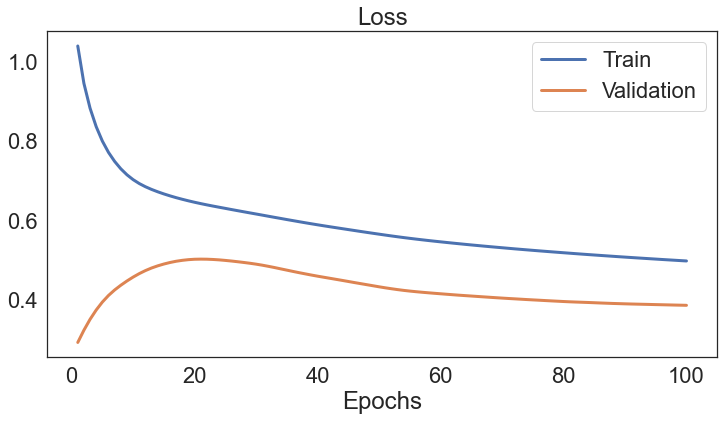

In [135]:
# Plotting model for training and Validation loss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

sns.set_style("white")

def model_analysis(history_ANN_SMOTE):
    train_loss = history_ANN_SMOTE["loss"]
    val_loss = history_ANN_SMOTE["val_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(12,6))
    plt.title("Loss")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.show()

model_analysis(history_ANN_SMOTE)

In [136]:
# Predicting target variabe using classifier

y_pred_ann_smote = classifier_ANN_SMOTE.predict(X_test)

# Rounding off y_pred_ann values to avoid valueerror in confusion matrix

y_pred_ann_smote = [int(np.round(x)) for x in y_pred_ann_smote]

In [137]:
# Plotting confusion matrix

cm_AS = confusion_matrix(y_test, y_pred_ann)

cm_AS

array([[2324,  542],
       [  14,   90]], dtype=int64)

In [138]:
# calculating ROC AUC score for ANN model

y_hat = lr1.predict(X_test_sc)

score_ANN_SMOTE = roc_auc_score(y_test, y_pred_ann_smote)

print(f'ROC AUC: {score_ANN_SMOTE}')

ROC AUC: 0.8201057491008643


In [139]:
# Storing results

TN = cm_AS[0,0] # true positive 
TP = cm_AS[1,1] # true negatives
FP = cm_AS[0,1] # false positives
FN = cm_AS[1,0] # false negatives

results.loc[len(results)] = ['ANN using SMOTE',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_ANN_SMOTE]
                              
results

,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.000000,0.000000,1.000000,0.206897,0.030976,0.557692
1,LR using SMOTE,0.855769,0.848569,0.151431,0.170172,0.283892,0.151178,0.852169
2,RF with HP tuning,0.528846,0.999651,0.000349,0.982143,0.687500,0.016835,0.735402
3,RF using SMOTE with HP tuning,0.788462,0.979065,0.020935,0.577465,0.666667,0.027609,0.879130
4,ANN,0.865385,0.810886,0.189114,0.142405,0.244565,0.187205,0.838135
5,ANN using SMOTE,0.865385,0.810886,0.189114,0.142405,0.244565,0.187205,0.820106


### 5.5 Model Building: Data Reconstruction Using Autoencoders on Balanaced Data

In [140]:
# Defining Autoencoder model layers

n_inputs = X_train_res.shape[1]

visible_r = Input(shape=(n_inputs,), name='input_layer')

layer_1_r = Dense(units=n_inputs,
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim = X_train_res.shape[1])(visible_r)

layer_2_r = Dense(units=n_inputs,
          kernel_initializer='he_uniform',
          activation='relu')(layer_1_r)

In [141]:
# Encoder layers

encoder_1_r = BatchNormalization()(layer_2_r)

encoder_2_r = Dense(hidden_nodes, activation='relu', name= 'hidden_encoder')(encoder_1_r)

encoder_3_r = BatchNormalization()(encoder_2_r)

# Bottleneck layer

z_r = Dense(latent_dimension, name='mean')(encoder_3_r)

# Encoder model

Encoder = Model(visible_r, z_r, name='Encoder')

# Decoder layers

input_decoder_r = Input(shape=(latent_dimension,), name="Input_Decoder")

batch_normalize1_r = BatchNormalization()(input_decoder_r)

decoder_hidden_layer_r = Dense(hidden_nodes, activation="relu", name="Hidden_Decoding")(batch_normalize1_r)

batch_normalize2_r = BatchNormalization()(decoder_hidden_layer_r)

decoded_result_r = Dense(n_inputs, activation="linear", name="Decoded")(batch_normalize2_r)

# Decoder model

decoder_r = Model(input_decoder_r, decoded_result_r, name="Decoder")

encoder_decoder_r = decoder_r(Encoder(layer_2_r))

In [142]:
# Defining Autoencoder model

ae = Model(visible_r, encoder_decoder_r)

In [143]:
# Compling classifier with loss, optimizer and metrics

ae.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(1e-4))

In [144]:
# fitting the model

history_ae = ae.fit(X_train_res, 
                 y_train_res, 
                 validation_data = (X_test, y_test), 
                 batch_size = batch_size, 
                 epochs = 50,
                 verbose= 2, 
                 shuffle=False).history

Epoch 1/50
211/211 - 6s - loss: 0.8272 - val_loss: 0.0826 - 6s/epoch - 26ms/step
Epoch 2/50
211/211 - 1s - loss: 0.5864 - val_loss: 0.1122 - 866ms/epoch - 4ms/step
Epoch 3/50
211/211 - 1s - loss: 0.4651 - val_loss: 0.0861 - 876ms/epoch - 4ms/step
Epoch 4/50
211/211 - 1s - loss: 0.4020 - val_loss: 0.0789 - 777ms/epoch - 4ms/step
Epoch 5/50
211/211 - 1s - loss: 0.3613 - val_loss: 0.0792 - 762ms/epoch - 4ms/step
Epoch 6/50
211/211 - 1s - loss: 0.3323 - val_loss: 0.0886 - 757ms/epoch - 4ms/step
Epoch 7/50
211/211 - 1s - loss: 0.3104 - val_loss: 0.1024 - 736ms/epoch - 3ms/step
Epoch 8/50
211/211 - 1s - loss: 0.2935 - val_loss: 0.1194 - 781ms/epoch - 4ms/step
Epoch 9/50
211/211 - 1s - loss: 0.2809 - val_loss: 0.1373 - 868ms/epoch - 4ms/step
Epoch 10/50
211/211 - 1s - loss: 0.2716 - val_loss: 0.1547 - 866ms/epoch - 4ms/step
Epoch 11/50
211/211 - 1s - loss: 0.2651 - val_loss: 0.1716 - 874ms/epoch - 4ms/step
Epoch 12/50
211/211 - 1s - loss: 0.2608 - val_loss: 0.1867 - 876ms/epoch - 4ms/step
Epo

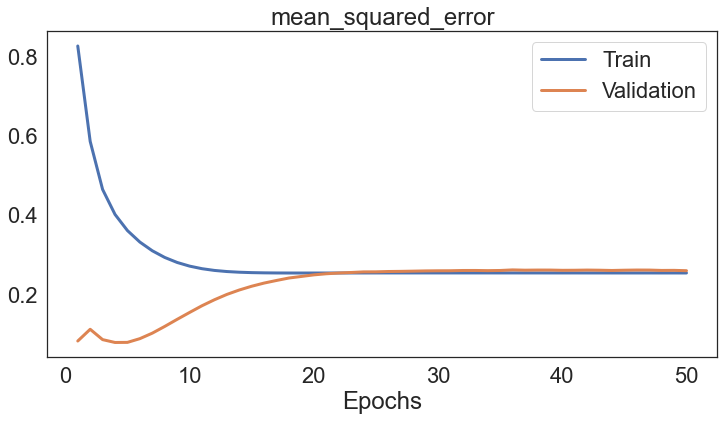

Training MSE = 0.5042747214937757
Validation MSE = 0.5099657038769438


In [145]:
# Plotting Reconstruction Loss

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

sns.set_style("white")

def model_analysis(history_ae):
    train_loss = history_ae["loss"]
    val_loss = history_ae["val_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(12, 6))
    plt.title("mean_squared_error")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    #plt.savefig("FirstNet.png", dpi=400)
    plt.show()
    print(f"Training MSE = {np.sqrt(train_loss[-1])}")
    print(f"Validation MSE = {np.sqrt(val_loss[-1])}")

model_analysis(history_ae)

(array([0.01054734, 0.03931276, 0.1035557 , 0.16204538, 0.27998392,
        0.40559287, 0.35285621, 0.37970423, 0.27902489, 0.19848169,
        0.14190956, 0.10259681, 0.09396716, 0.15437465, 0.04123049,
        0.04410704, 0.02780661, 0.01150618, 0.00287655, 0.00671194,
        0.0019177 , 0.00287655, 0.00095885, 0.0019177 , 0.        ,
        0.00095885, 0.        , 0.        , 0.        , 0.00095885]),
 array([-5.1483345 , -4.797184  , -4.446033  , -4.0948825 , -3.7437317 ,
        -3.3925812 , -3.0414305 , -2.6902797 , -2.3391292 , -1.9879785 ,
        -1.6368278 , -1.2856771 , -0.93452644, -0.58337575, -0.2322251 ,
         0.11892557,  0.47007623,  0.8212269 ,  1.1723776 ,  1.5235282 ,
         1.874679  ,  2.2258296 ,  2.5769804 ,  2.9281309 ,  3.2792816 ,
         3.6304324 ,  3.9815829 ,  4.3327336 ,  4.683884  ,  5.035035  ,
         5.3861856 ], dtype=float32),
 <BarContainer object of 30 artists>)

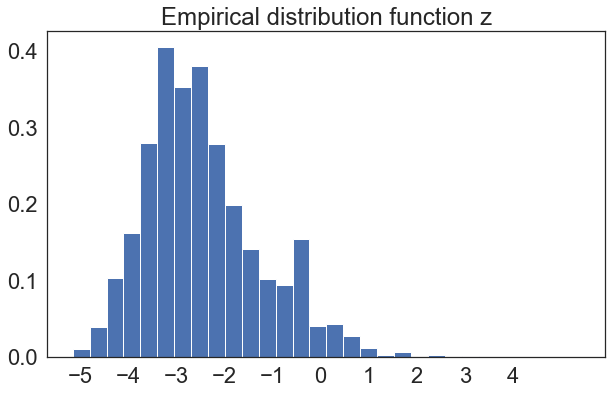

In [146]:
# Plotting distribution of values predicted from Encoder model for X_test

plt.figure(figsize=(10, 6))

plt.title("Empirical distribution function z")

plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4))

plt.hist(Encoder.predict(X_test), bins=30, density=True)

#### 5.5.1 Autoencoder Prediction

In [147]:
# Checking Autoencoder prediction 
ae.predict(X_test)[0,:]

array([0.5550044 , 0.5313232 , 0.55194443, 0.5126862 , 0.5407605 ,
       0.5252151 , 0.53673446, 0.5155761 ], dtype=float32)

In [148]:
# Creating dataframe from Autoencoder output

output_ae = pd.DataFrame(ae.predict(X_test))
output_ae.columns = X_test.columns
output_ae.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.555004,0.531323,0.551944,0.512686,0.540761,0.525215,0.536734,0.515576
1,0.494923,0.497501,0.515152,0.497656,0.494040,0.501397,0.474558,0.484351
2,0.517859,0.516731,0.525744,0.518867,0.515680,0.520568,0.518321,0.522490
3,0.536683,0.532513,0.534437,0.536275,0.533440,0.536302,0.554236,0.553791
4,0.521535,0.504007,0.515915,0.507256,0.506099,0.512878,0.513684,0.507696


In [149]:
# Descaling the data
output_ae = scaler.inverse_transform(output_ae)

In [150]:
output_ae = pd.DataFrame(output_ae, columns = X_test.columns)
output_ae.columns = X_test.columns
output_ae.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,300.406067,310.003723,1730.983276,46.522591,136.812408,0.525215,0.536734,0.515576
1,299.853302,309.729767,1693.455200,45.607265,124.992195,0.501397,0.474558,0.484351
2,300.064301,309.885529,1704.259033,46.899010,130.467117,0.520568,0.518321,0.522490
3,300.237488,310.013367,1713.125732,47.959141,134.960327,0.536302,0.554236,0.553791
4,300.098114,309.782440,1694.232910,46.191917,128.042984,0.512878,0.513684,0.507696


In [151]:
# Renaming columns
output_ae.rename(columns = {'Type_H':'H', 'Type_L': 'L', 'Type_M': 'M'}, inplace = True)

In [152]:
# Converting numerical dummy variables to categrical varible
dic = {0: "0", 1: "1"}

output_ae['Type'] = output_ae.iloc[:,5:].idxmax(axis=1)

output_ae.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Type
0,300.406067,310.003723,1730.983276,46.522591,136.812408,0.525215,0.536734,0.515576,L
1,299.853302,309.729767,1693.455200,45.607265,124.992195,0.501397,0.474558,0.484351,H
2,300.064301,309.885529,1704.259033,46.899010,130.467117,0.520568,0.518321,0.522490,M
3,300.237488,310.013367,1713.125732,47.959141,134.960327,0.536302,0.554236,0.553791,L
4,300.098114,309.782440,1694.232910,46.191917,128.042984,0.512878,0.513684,0.507696,L


In [153]:
# Dropping dummy numerical columns
output_ae = output_ae.drop(['H', 'L', 'M'], axis=1)

In [154]:
# Checking dataframe
output_ae.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,300.406067,310.003723,1730.983276,46.522591,136.812408,L
1,299.853302,309.729767,1693.455200,45.607265,124.992195,H
2,300.064301,309.885529,1704.259033,46.899010,130.467117,M
3,300.237488,310.013367,1713.125732,47.959141,134.960327,L
4,300.098114,309.782440,1694.232910,46.191917,128.042984,L


In [156]:
# Defining Empirical Cumulative Distribution Function

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(Encoder.predict(X_test)[:, 0])

ecdf

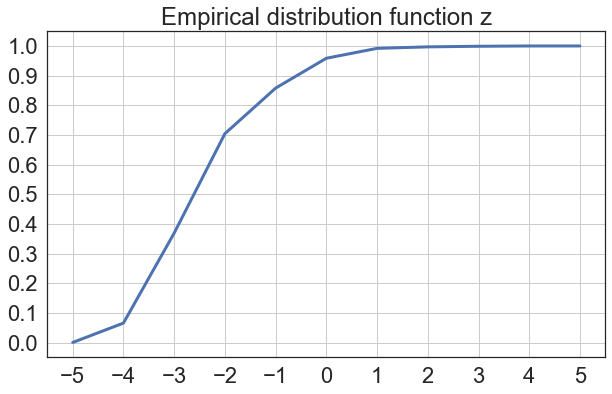

In [157]:
# Plotting Empirical Cumulative Distribution Function

plt.figure(figsize=(10, 6))
plt.title("Empirical distribution function z")
x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(x)
plt.grid()
plt.plot(x, ecdf(x), linewidth=3)
plt.show()

In [158]:
# Interpolating the values into 1D

from scipy.interpolate import interp1d

x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)

sample_edf_values_at_slope_changes = [ecdf(i) for i in x]

inverted_edf = interp1d(sample_edf_values_at_slope_changes, x,bounds_error=False, fill_value=0)

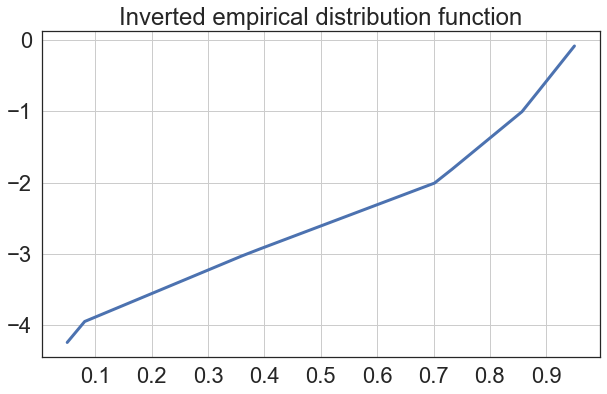

In [159]:
# Plotting Inverted empirical distribution function
from numpy.random import uniform
from numpy.random import seed

seed(2021)

plt.figure(figsize=(10, 6))

plt.title("Inverted empirical distribution function")

x = np.linspace(0.05, 0.95, 30)

plt.xticks(np.linspace(0, 1.0, 11))

plt.grid()

plt.plot(x, inverted_edf(x), linewidth=3)

plt.show()

#### 5.5.2 Synthetic Data creation

(array([0.07447554, 0.13693889, 0.31051493, 0.33994478, 0.35856367,
        0.33574052, 0.34895392, 0.32973443, 0.33093565, 0.35916428,
        0.3801856 , 0.36276793, 0.38979534, 0.35375879, 0.36817341,
        0.36216732, 0.21982295, 0.18498762, 0.17477726, 0.17117361,
        0.17597848, 0.18318579, 0.16877117, 0.1243261 , 0.10390538,
        0.11111269, 0.1117133 , 0.11231391, 0.11231391, 0.11111269]),
 array([-4.24482139, -4.10607337, -3.96732535, -3.82857732, -3.6898293 ,
        -3.55108128, -3.41233325, -3.27358523, -3.13483721, -2.99608918,
        -2.85734116, -2.71859314, -2.57984511, -2.44109709, -2.30234907,
        -2.16360104, -2.02485302, -1.886105  , -1.74735697, -1.60860895,
        -1.46986093, -1.33111291, -1.19236488, -1.05361686, -0.91486884,
        -0.77612081, -0.63737279, -0.49862477, -0.35987674, -0.22112872,
        -0.0823807 ]),
 <BarContainer object of 30 artists>)

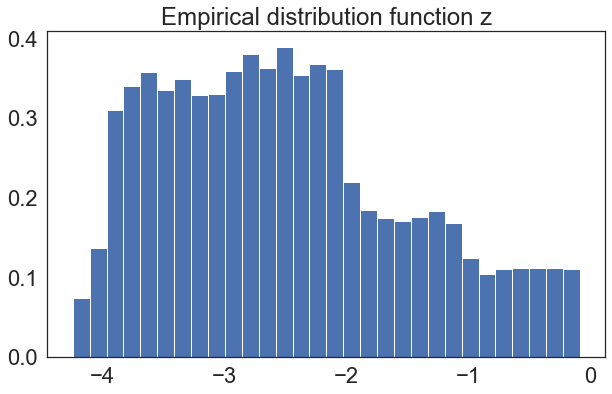

In [160]:
# Plotting Empirical Cumulative Distribution Function for 12000 datapoints

N = 12000

seed(2021)

plt.figure(figsize=(10, 6))

plt.title("Empirical distribution function z")

plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4))

plt.hist(inverted_edf(uniform(0.05, 0.95, N)), bins=30, density=True)

In [161]:
# Predicting 12000 instances from autoencoder function and converting to dataframe
N = 12000

output_ae_new = pd.DataFrame(decoder_r(inverted_edf(uniform(0.04, 0.95, N))).numpy())

output_ae_new.columns = X_test.columns

In [162]:
# Descaling the data
output_ae_new = scaler.inverse_transform(output_ae_new)

In [163]:
# Creating dataframe
output_ae_new = pd.DataFrame(output_ae_new, columns = X_test.columns)
output_ae_new.columns = X_test.columns
output_ae_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,300.756866,306.976135,1434.996948,30.467983,54.748894,0.485134,0.237346,0.271897
1,303.069946,299.781433,798.672607,-11.421235,-127.972366,0.431610,-0.468928,-0.351213
2,302.937134,300.194611,835.216370,-9.015539,-117.478630,0.434684,-0.428366,-0.315427
3,300.594421,307.481506,1479.693481,33.410339,67.583397,0.488894,0.286955,0.315665
4,300.024750,309.729736,1685.474731,46.113121,125.953156,0.509938,0.508191,0.505818


In [164]:
# Checking dataframe 

output_ae_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,300.756866,306.976135,1434.996948,30.467983,54.748894,0.485134,0.237346,0.271897
1,303.069946,299.781433,798.672607,-11.421235,-127.972366,0.431610,-0.468928,-0.351213
2,302.937134,300.194611,835.216370,-9.015539,-117.478630,0.434684,-0.428366,-0.315427
3,300.594421,307.481506,1479.693481,33.410339,67.583397,0.488894,0.286955,0.315665
4,300.024750,309.729736,1685.474731,46.113121,125.953156,0.509938,0.508191,0.505818


In [165]:
# Renaming columns
output_ae_new.rename(columns = {'Type_H':'H', 'Type_L': 'L', 'Type_M': 'M'}, inplace = True)

In [166]:
# Converting numerical dummy variables to categrical varible
dic = {0: "0", 1: "1"}

output_ae_new['Type'] = output_ae_new.iloc[:,5:].idxmax(axis=1)

output_ae_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Type
0,300.756866,306.976135,1434.996948,30.467983,54.748894,0.485134,0.237346,0.271897,H
1,303.069946,299.781433,798.672607,-11.421235,-127.972366,0.431610,-0.468928,-0.351213,H
2,302.937134,300.194611,835.216370,-9.015539,-117.478630,0.434684,-0.428366,-0.315427,H
3,300.594421,307.481506,1479.693481,33.410339,67.583397,0.488894,0.286955,0.315665,H
4,300.024750,309.729736,1685.474731,46.113121,125.953156,0.509938,0.508191,0.505818,H


In [167]:
# Dropping dummy numerical columns
output_ae_new = output_ae_new.drop(['H', 'L', 'M'], axis=1)

In [169]:
# Checking dataframe
output_ae_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,300.756866,306.976135,1434.996948,30.467983,54.748894,H
1,303.069946,299.781433,798.672607,-11.421235,-127.972366,H
2,302.937134,300.194611,835.216370,-9.015539,-117.478630,H
3,300.594421,307.481506,1479.693481,33.410339,67.583397,H
4,300.024750,309.729736,1685.474731,46.113121,125.953156,H


In [170]:
# Checking shape of dataframe
output_ae_new.shape

(12000, 6)

### 5.7 Model Building: Multitask Learning using SMOTE

In [171]:
# Multitask learning

n_inputs = X_train_res.shape[1]

# Shared layers
visible = Input(shape=(n_inputs,), name='input_layer')

layer_1 = Dense(units=n_inputs,
          kernel_initializer='he_uniform',
          activation='relu',
          input_dim = X_train_res.shape[1])(visible)

# Classification task
layer_2 = Dense(units=n_inputs,
          kernel_initializer='he_uniform',
          activation='relu')(layer_1)

x_out = Dense(units= 1,
              kernel_initializer = 'glorot_uniform',
              activation = 'sigmoid',
              name = 'Classifier')(layer_2)

In [172]:
# Auxiliary Task

# Encoder layers
encoder_1 = BatchNormalization()(layer_2)

encoder_2 = Dense(hidden_nodes, activation='relu', name= 'hidden_encoder')(encoder_1)

encoder_3 = BatchNormalization()(encoder_2)

# Bottleneck layer
z = Dense(latent_dimension, name='mean')(encoder_3)

# Encoder model
Encoder = Model(visible, z, name='Encoder')

# Decoder layer

input_decoder = Input(shape=(latent_dimension,), name="Input_Decoder")

batch_normalize1 = BatchNormalization()(input_decoder)

decoder_hidden_layer = Dense(hidden_nodes, activation="relu", name="Hidden_Decoding")(batch_normalize1)

batch_normalize2 = BatchNormalization()(decoder_hidden_layer)

decoded_result = Dense(n_inputs, activation="linear", name="Decoded")(batch_normalize2)

# Decoder layer
decoder = Model(input_decoder, decoded_result, name="Decoder")

# Defining encoder-decoder
encoder_decoder = decoder(Encoder(layer_2))

In [173]:
# Encoder model summary
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 8)]               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 hidden_encoder (Dense)      (None, 16)                144       
                                                                 
 batch_normalization_5 (Batc  (None, 16)               64        
 hNormalization)                                           

In [174]:
# Decoder model summary
decoder.summary()

Model: "Decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Decoder (InputLayer)  [(None, 1)]               0         
                                                                 
 batch_normalization_6 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 Hidden_Decoding (Dense)     (None, 16)                32        
                                                                 
 batch_normalization_7 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 Decoded (Dense)             (None, 8)                 136       
                                                                 
Total params: 236
Trainable params: 202
Non-trainable param

In [175]:
# Defining multitask  model
MTL = Model(inputs=visible, outputs= [x_out, encoder_decoder])

In [176]:
# Multitask model summary
MTL.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 8)            72          ['input_layer[0][0]']            
                                                                                                  
 dense_7 (Dense)                (None, 8)            72          ['dense_6[0][0]']                
                                                                                                  
 Encoder (Functional)           (None, 1)            401         ['dense_7[0][0]']                
                                                                                            

In [177]:
# Defining classification and reconstruction loss
losses={'Classifier': 'binary_crossentropy', 'Decoder': 'mean_squared_error'}

# Compling multitask model with optimizer and loss
MTL.compile(optimizer=keras.optimizers.Adam(1e-4), loss=losses)

In [178]:
# fitting the MTL model
history = MTL.fit(X_train_res,
                  [y_train_res, y_train_res],
                  batch_size=batch_size,
                  epochs=100,
                  verbose=2,
                  validation_data=(X_test, [y_test, y_test]),).history

Epoch 1/100
211/211 - 9s - loss: 1.8687 - Classifier_loss: 0.7060 - Decoder_loss: 1.1627 - val_loss: 0.8148 - val_Classifier_loss: 0.7598 - val_Decoder_loss: 0.0550 - 9s/epoch - 41ms/step
Epoch 2/100
211/211 - 1s - loss: 1.3792 - Classifier_loss: 0.7044 - Decoder_loss: 0.6748 - val_loss: 0.8329 - val_Classifier_loss: 0.7526 - val_Decoder_loss: 0.0803 - 896ms/epoch - 4ms/step
Epoch 3/100
211/211 - 1s - loss: 1.1822 - Classifier_loss: 0.7026 - Decoder_loss: 0.4796 - val_loss: 0.8199 - val_Classifier_loss: 0.7469 - val_Decoder_loss: 0.0730 - 874ms/epoch - 4ms/step
Epoch 4/100
211/211 - 1s - loss: 1.0778 - Classifier_loss: 0.7010 - Decoder_loss: 0.3768 - val_loss: 0.8037 - val_Classifier_loss: 0.7403 - val_Decoder_loss: 0.0634 - 987ms/epoch - 5ms/step
Epoch 5/100
211/211 - 1s - loss: 1.0102 - Classifier_loss: 0.6995 - Decoder_loss: 0.3107 - val_loss: 0.7947 - val_Classifier_loss: 0.7354 - val_Decoder_loss: 0.0594 - 878ms/epoch - 4ms/step
Epoch 6/100
211/211 - 1s - loss: 0.9615 - Classifier

Epoch 45/100
211/211 - 1s - loss: 0.7230 - Classifier_loss: 0.6166 - Decoder_loss: 0.1063 - val_loss: 0.7212 - val_Classifier_loss: 0.6370 - val_Decoder_loss: 0.0842 - 970ms/epoch - 5ms/step
Epoch 46/100
211/211 - 1s - loss: 0.7160 - Classifier_loss: 0.6125 - Decoder_loss: 0.1035 - val_loss: 0.7149 - val_Classifier_loss: 0.6341 - val_Decoder_loss: 0.0808 - 1s/epoch - 5ms/step
Epoch 47/100
211/211 - 1s - loss: 0.7111 - Classifier_loss: 0.6078 - Decoder_loss: 0.1033 - val_loss: 0.7166 - val_Classifier_loss: 0.6320 - val_Decoder_loss: 0.0846 - 935ms/epoch - 4ms/step
Epoch 48/100
211/211 - 1s - loss: 0.7059 - Classifier_loss: 0.6021 - Decoder_loss: 0.1038 - val_loss: 0.7188 - val_Classifier_loss: 0.6327 - val_Decoder_loss: 0.0861 - 955ms/epoch - 5ms/step
Epoch 49/100
211/211 - 1s - loss: 0.6977 - Classifier_loss: 0.5938 - Decoder_loss: 0.1039 - val_loss: 0.7233 - val_Classifier_loss: 0.6339 - val_Decoder_loss: 0.0893 - 1s/epoch - 5ms/step
Epoch 50/100
211/211 - 1s - loss: 0.6912 - Classifi

Epoch 89/100
211/211 - 1s - loss: 0.4938 - Classifier_loss: 0.3989 - Decoder_loss: 0.0949 - val_loss: 0.5106 - val_Classifier_loss: 0.4288 - val_Decoder_loss: 0.0819 - 979ms/epoch - 5ms/step
Epoch 90/100
211/211 - 1s - loss: 0.4940 - Classifier_loss: 0.3965 - Decoder_loss: 0.0975 - val_loss: 0.5058 - val_Classifier_loss: 0.4258 - val_Decoder_loss: 0.0800 - 902ms/epoch - 4ms/step
Epoch 91/100
211/211 - 1s - loss: 0.4886 - Classifier_loss: 0.3942 - Decoder_loss: 0.0944 - val_loss: 0.5094 - val_Classifier_loss: 0.4238 - val_Decoder_loss: 0.0855 - 872ms/epoch - 4ms/step
Epoch 92/100
211/211 - 1s - loss: 0.4896 - Classifier_loss: 0.3921 - Decoder_loss: 0.0975 - val_loss: 0.5035 - val_Classifier_loss: 0.4221 - val_Decoder_loss: 0.0814 - 811ms/epoch - 4ms/step
Epoch 93/100
211/211 - 1s - loss: 0.4849 - Classifier_loss: 0.3898 - Decoder_loss: 0.0951 - val_loss: 0.5046 - val_Classifier_loss: 0.4188 - val_Decoder_loss: 0.0857 - 812ms/epoch - 4ms/step
Epoch 94/100
211/211 - 1s - loss: 0.4842 - Cl

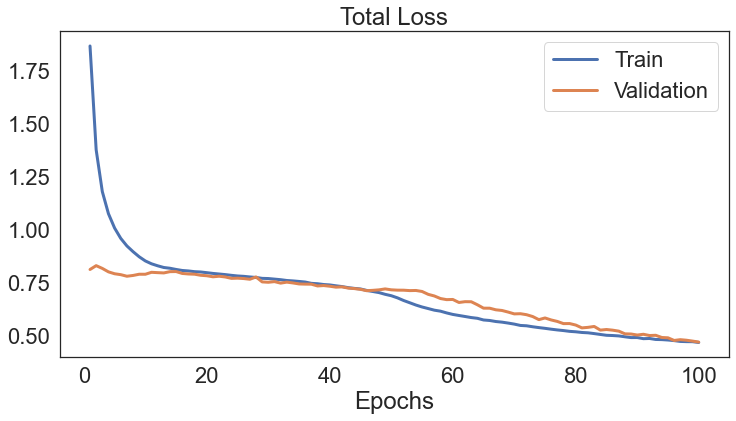

In [179]:
# Total Loss- MTl setup

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)

sns.set_style("white")


def model_analysis(history):
    train_loss = history["loss"]
    val_loss = history["val_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(12,6))
    plt.title("Total Loss")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.show()

model_analysis(history)

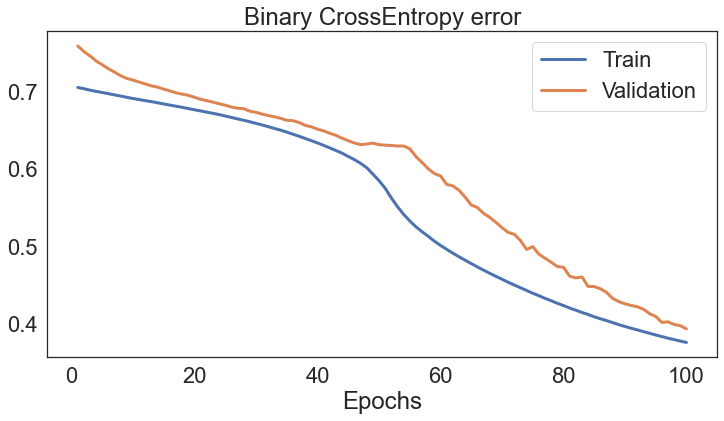

In [180]:
# Classification Loss

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)

sns.set_style("white")


def model_analysis(history):
    train_loss = history["Classifier_loss"]
    val_loss = history["val_Classifier_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(12, 6))
    plt.title("Binary CrossEntropy error")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.show()

model_analysis(history)

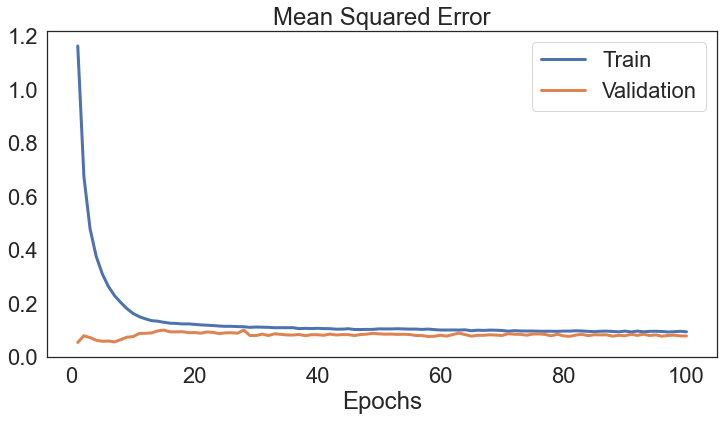

Training KL = 0.3080878396288093
Validation KL = 0.28149099091804913


In [181]:
# Reconstruction Loss

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)

sns.set_style("white")

def model_analysis(history):
    train_loss = history["Decoder_loss"]
    val_loss = history["val_Decoder_loss"]
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(12, 6))
    plt.title("Mean Squared Error")
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.show()
    print(f"Training KL = {np.sqrt(train_loss[-1])}")
    print(f"Validation KL = {np.sqrt(val_loss[-1])}")

model_analysis(history)

In [182]:
# Calculating primary task -classification ROC AUC score
y_hat = MTL.predict(X_test)

score_MTL = roc_auc_score(y_test, y_hat[0])

print(f'ROC AUC: {score_MTL}')

ROC AUC: 0.93133689408986


In [183]:
# Rounding off y_pred_ann values to avoid valueerror in confusion matrix

y_hat = [np.round(x) for x in y_hat[0]]

In [184]:
# Plotting confusion matrix

cm = confusion_matrix(y_test, y_hat)

cm

array([[2450,  416],
       [  13,   91]], dtype=int64)

In [185]:
# Storing results

TN = cm[0,0] # true positive 
TP = cm[1,1] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

results.loc[len(results)] = ['MTL using SMOTE',
                             TP / float(TP+FN),
                             TN / float(TN+FP),
                             FP / float(TN+FP),
                             TP / float(TP+FP),
                             2*(((TP / float(TP+FP)*(TP / float(TP+FN)))/(TP / float(TP+FP)+(TP / float(TP+FN))))),
                             (FN+FP)/(TP+TN+FP+FN),
                             score_MTL]
                              
results

,Algorithm,Sensitivity/Recall,Specificity,FPR,Precision,F1 Score,Misclassification Rate,ROC AUC
0,LR,0.115385,1.000000,0.000000,1.000000,0.206897,0.030976,0.557692
1,LR using SMOTE,0.855769,0.848569,0.151431,0.170172,0.283892,0.151178,0.852169
2,RF with HP tuning,0.528846,0.999651,0.000349,0.982143,0.687500,0.016835,0.735402
3,RF using SMOTE with HP tuning,0.788462,0.979065,0.020935,0.577465,0.666667,0.027609,0.879130
4,ANN,0.865385,0.810886,0.189114,0.142405,0.244565,0.187205,0.838135
5,ANN using SMOTE,0.865385,0.810886,0.189114,0.142405,0.244565,0.187205,0.820106
6,MTL using SMOTE,0.875000,0.854850,0.145150,0.179487,0.297872,0.144444,0.931337



### 5.7.1 MTL auxiliary task prediction

In [186]:
# Checing MTl preidction
y_MTL = MTL.predict(X_test)

In [187]:
# Creating dataframe from MTL output

output_MTL = pd.DataFrame(y_MTL[1], columns= X_train.columns)
output_MTL.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.414619,0.402671,0.421585,0.422908,0.456043,0.425166,0.427474,0.418676
1,0.035245,0.065103,0.032297,0.074280,0.045566,0.070393,0.040776,0.047644
2,0.035415,0.065809,0.033342,0.075011,0.045769,0.070511,0.041350,0.048719
3,0.040747,0.020961,0.008606,0.005210,0.025222,0.014882,0.025277,0.011946
4,0.052968,0.102750,0.082181,0.115897,0.066096,0.078176,0.088523,0.097302


In [188]:
# Descaling the data
output_MTL = scaler.inverse_transform(output_MTL)

In [189]:
# Creating dataframe
output_MTL = pd.DataFrame(output_MTL, columns= X_test.columns)
output_MTL.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,299.114471,308.961639,1598.016479,41.055115,115.378967,0.425166,0.427474,0.418676
1,295.624268,306.227325,1200.942749,19.823664,11.528324,0.070393,0.040776,0.047644
2,295.625793,306.233063,1202.009155,19.868164,11.579672,0.070511,0.041350,0.048719
3,295.674866,305.869812,1176.778564,15.617295,6.381175,0.014882,0.025277,0.011946
4,295.787323,306.532288,1251.824829,22.358139,16.722343,0.078176,0.088523,0.097302
5,295.662170,305.931061,1157.476562,15.027658,2.740484,0.015132,0.028979,-0.000700
6,302.115356,311.975800,1971.449341,62.443523,188.341003,0.767907,0.743856,0.760014
7,296.788696,307.132141,1333.361694,26.096085,47.819386,0.203417,0.202943,0.180339
8,296.906158,306.862122,1349.218994,25.192715,47.235767,0.151571,0.153958,0.169143
9,295.888916,306.597595,1264.554199,22.881805,19.486427,0.084334,0.105442,0.106811


In [190]:
# Renaming columns
output_MTL.rename(columns = {'Type_H':'H', 'Type_L': 'L', 'Type_M': 'M'}, inplace = True)

In [191]:
# Converting numerical dummy variables to categrical varible
dic = {0: "0", 1: "1"}

output_MTL['Type'] = output_MTL.iloc[:,5:].idxmax(axis=1)

output_MTL.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Type
0,299.114471,308.961639,1598.016479,41.055115,115.378967,0.425166,0.427474,0.418676,L
1,295.624268,306.227325,1200.942749,19.823664,11.528324,0.070393,0.040776,0.047644,H
2,295.625793,306.233063,1202.009155,19.868164,11.579672,0.070511,0.041350,0.048719,H
3,295.674866,305.869812,1176.778564,15.617295,6.381175,0.014882,0.025277,0.011946,L
4,295.787323,306.532288,1251.824829,22.358139,16.722343,0.078176,0.088523,0.097302,M


In [192]:
# Dropping dummy numerical columns
output_MTL = output_MTL.drop(['H', 'L', 'M'], axis=1)

In [194]:
# Checking dataframe
output_MTL.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,299.114471,308.961639,1598.016479,41.055115,115.378967,L
1,295.624268,306.227325,1200.942749,19.823664,11.528324,H
2,295.625793,306.233063,1202.009155,19.868164,11.579672,H
3,295.674866,305.869812,1176.778564,15.617295,6.381175,L
4,295.787323,306.532288,1251.824829,22.358139,16.722343,M


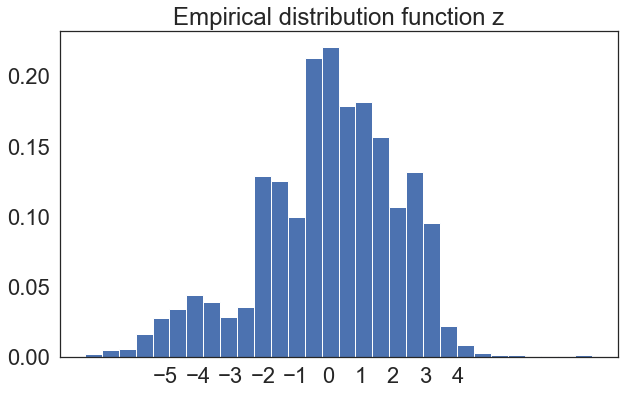

In [195]:
# Defining Empirical Cumulative Distribution Function

plt.figure(figsize=(10,6))

plt.title("Empirical distribution function z")

plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4))

plt.hist(Encoder.predict(X_test), bins=30, density=True)

plt.show()

In [196]:
# Defining Empirical Cumulative Distribution Function

from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(Encoder.predict(X_test)[:, 0])

ecdf

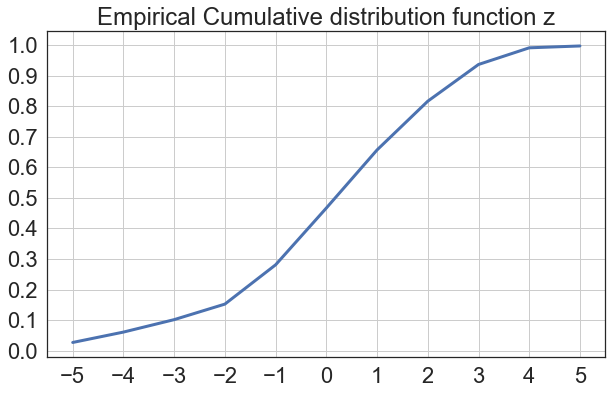

In [197]:
# Plotting Empirical Cumulative Distribution Function
plt.figure(figsize=(10,6))
plt.title("Empirical Cumulative distribution function z")
x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(x)
plt.grid()
plt.plot(x, ecdf(x), linewidth=3)

In [198]:
# Interpolating the values into 1D

from scipy.interpolate import interp1d

x = (-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5)

sample_edf_values_at_slope_changes = [ecdf(i) for i in x]

inverted_edf = interp1d(sample_edf_values_at_slope_changes, x,bounds_error=False, fill_value=0)

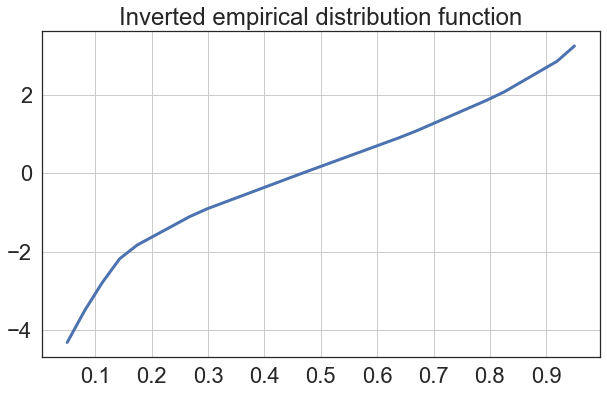

In [199]:
# Plotting Inverted empirical distribution function
from numpy.random import uniform
from numpy.random import seed

seed(2021)

plt.figure(figsize=(10,6))

plt.title("Inverted empirical distribution function")

x = np.linspace(0.05, 0.95, 30)

plt.xticks(np.linspace(0, 1.0, 11))

plt.grid()

plt.plot(x, inverted_edf(x), linewidth=3)

### 5.7.2 Synthetic data creation

(array([0.03772412, 0.04288637, 0.04209217, 0.03692993, 0.04606313,
        0.04844571, 0.05162248, 0.0591673 , 0.05360796, 0.12945329,
        0.15049938, 0.13421844, 0.15010228, 0.19060607, 0.20251895,
        0.20331314, 0.21284345, 0.21284345, 0.22634471, 0.20172476,
        0.21284345, 0.17472223, 0.18981188, 0.18623802, 0.17988448,
        0.14057198, 0.12349685, 0.13501263, 0.13263006, 0.06274117]),
 array([-4.31183515, -4.06000686, -3.80817858, -3.55635029, -3.30452201,
        -3.05269372, -2.80086544, -2.54903715, -2.29720887, -2.04538058,
        -1.7935523 , -1.54172401, -1.28989573, -1.03806744, -0.78623916,
        -0.53441087, -0.28258259, -0.0307543 ,  0.22107398,  0.47290227,
         0.72473055,  0.97655884,  1.22838712,  1.48021541,  1.73204369,
         1.98387198,  2.23570027,  2.48752855,  2.73935684,  2.99118512,
         3.24301341]),
 <BarContainer object of 30 artists>)

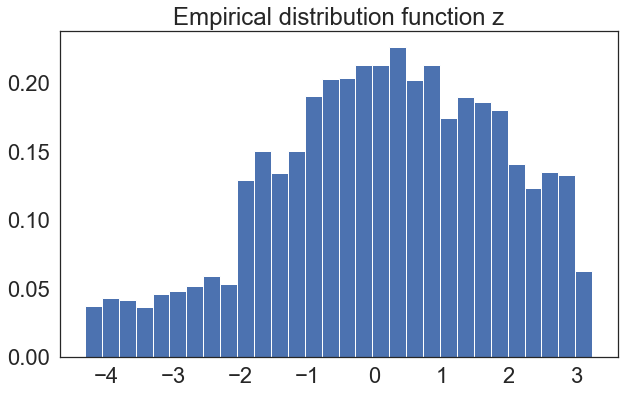

In [200]:
# Plotting Empirical Cumulative Distribution Function for 12000 datapoints

N = 10000

seed(2021)

plt.figure(figsize=(10,6))

plt.title("Empirical distribution function z")

plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4))

plt.hist(inverted_edf(uniform(0.05, 0.95, N)), bins=30, density=True)

In [201]:
# Predicting 10000 instances from autoencoder function and converting to dataframe

N = 15000

output_MTL_new = pd.DataFrame(decoder(inverted_edf(uniform(0.04, 0.95, N))).numpy())

output_MTL_new.columns = X_test.columns

output_MTL_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,0.230949,0.202737,0.233962,0.221672,0.243674,0.210585,0.212523,0.225785
1,0.921694,0.910386,0.905009,0.905684,0.894209,0.904620,0.918516,0.921370
2,0.943745,0.940601,0.932407,0.929555,0.921569,0.937782,0.942410,0.945505
3,0.654288,0.646342,0.705837,0.690684,0.660050,0.654774,0.641240,0.640108
4,0.967037,0.972515,0.961345,0.954767,0.950468,0.972810,0.967649,0.970997


In [202]:
# Descaling the data
output_MTL_new = scaler.inverse_transform(output_MTL_new)

In [203]:
# Creating dataframe
output_MTL_new = pd.DataFrame(output_MTL_new, columns = X_train.columns)
output_MTL_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,297.424744,307.342163,1406.641235,28.799807,61.649410,0.210585,0.212523,0.225785
1,303.779572,313.074127,2091.109375,70.456154,226.234894,0.904620,0.918516,0.921370
2,303.982452,313.318878,2119.054688,71.909866,233.157043,0.937782,0.942410,0.945505
3,301.319427,310.935364,1887.953857,57.362629,166.992767,0.654774,0.641240,0.640108
4,304.196716,313.577393,2148.571533,73.445328,240.468491,0.972810,0.967649,0.970997


In [204]:
# Renaming columns
output_MTL_new.rename(columns = {'Type_H':'H', 'Type_L': 'L', 'Type_M': 'M'}, inplace = True)

In [205]:
# Converting numerical dummy variables to categrical varible
dic = {0: "0", 1: "1"}

output_MTL_new['Type'] = output_MTL_new.iloc[:,5:].idxmax(axis=1)

output_MTL_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Type
0,297.424744,307.342163,1406.641235,28.799807,61.649410,0.210585,0.212523,0.225785,M
1,303.779572,313.074127,2091.109375,70.456154,226.234894,0.904620,0.918516,0.921370,M
2,303.982452,313.318878,2119.054688,71.909866,233.157043,0.937782,0.942410,0.945505,M
3,301.319427,310.935364,1887.953857,57.362629,166.992767,0.654774,0.641240,0.640108,H
4,304.196716,313.577393,2148.571533,73.445328,240.468491,0.972810,0.967649,0.970997,H


In [206]:
# Dropping dummy numerical columns
output_MTL_new = output_MTL_new.drop(['H', 'L', 'M'], axis=1)

In [208]:
def round_cols(val):
    for i in output_MTL_new[val]:
        return [abs(round(x, 1)) for x in output_MTL_new[val]]

In [209]:
cols_to_round = output_MTL_new.columns[:-1]

for i in cols_to_round:
    output_MTL_new[i] = round_cols(i)

In [210]:
# Checing dataframe
output_MTL_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type
0,297.4,307.3,1406.6,28.8,61.6,M
1,303.8,313.1,2091.1,70.5,226.2,M
2,304.0,313.3,2119.1,71.9,233.2,M
3,301.3,310.9,1888.0,57.4,167.0,H
4,304.2,313.6,2148.6,73.4,240.5,H
